# Analyse results
Here we will analyze the first results of the experiments

## Data Loading
We load the data and merge the  different files. Furthermore, we rename the variables for ansatz, optimizer and featuremap to make the more user friendly.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

from scipy.stats import friedmanchisquare,  wilcoxon, kruskal, mannwhitneyu

sns.set(font_scale=1.25)
sns.set(style='white', palette=None)

In [2]:
declare = True

res = []

for optimizer in ['cobyla', 'spsa', 'neldermead']:
    for init in ['uniform', 'normal', 'beta']:
        r = pd.read_csv("../reports/results/rice___{}_pca_{}_results.csv".format(optimizer, init), index_col=0)
        r['initialization'] = init

        res.append(r)

res = pd.concat(res)
res.head()

accuracy        f1         time   
index                                    
0         0.540  0.468275  1004.087513  \
1         0.548  0.541351   950.573234   
2         0.560  0.557000   835.213769   
3         0.492  0.380034   878.246817   
4         0.548  0.547588  1709.575860   

                                              ansatz   
index                                                  
0      <function get_efficientsu2 at 0x7fdf5041ed30>  \
1      <function get_efficientsu2 at 0x7fdf5041ed30>   
2      <function get_efficientsu2 at 0x7fdf5041ed30>   
3      <function get_efficientsu2 at 0x7fdf5041ed30>   
4      <function get_efficientsu2 at 0x7fdf5041ed30>   

                                     optimizer   
index                                            
0      <function get_cobyla at 0x7fdf1f1a4160>  \
1      <function get_cobyla at 0x7fdf1f1a4160>   
2      <function get_cobyla at 0x7fdf1f1a4160>   
3      <function get_cobyla at 0x7fdf1f1a4160>   
4      <function get_cobyla at 0x7fdf1f1a4160>   

                                          featuremap entanglement   
index                                                               
0       <function get_zfeaturemap at 0x7fdf575941f0>         full  \
1       <function get_zfeaturemap at 0x7fdf575941f0>       linear   
2       <function get_zfeaturemap at 0x7fdf575941f0>     circular   
3       <function get_zfeaturemap at 0x7fdf575941f0>          sca   
4      <function get_zzfeaturemap at 0x7fdf57594280>         full   

      entanglement_featuremap  iterations preprocessing initialization  
index                                                                   
0                         NaN         194           pca        uniform  
1                         NaN         203           pca        uniform  
2                         NaN         175           pca        uniform  
3                         NaN         185           pca        uniform  
4                        full         225           pca        uniform

In [3]:
# if ansatz contains 'efficientsu2' replace with 'efficient_su2'
res['ansatz'] = res['ansatz'].apply(lambda x: 'efficient_su2' if 'efficientsu2' in x else x)
# if ansatz = 'paulitwodesign' replace with 'pauli_two_design'
res['ansatz'] = res['ansatz'].apply(lambda x: 'pauli_two_design' if 'paulitwodesign' in x else x)
# if ansatz = 'realamplitudes' replace with 'real_amplitudes'
res['ansatz'] = res['ansatz'].apply(lambda x: 'real_amplitudes' if 'realamplitudes' in x else x)
# if ansatz = 'twolocal' replace with 'two_local'
res['ansatz'] = res['ansatz'].apply(lambda x: 'two_local' if 'twolocal' in x else x)
# otherwise drop
res = res[res['ansatz'].isin(['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local'])]

In [4]:
# if optimizer contains 'cobyla' replace with 'cobyla'
res['optimizer'] = res['optimizer'].apply(lambda x: 'cobyla' if 'cobyla' in x else x)
# if optimizer = 'lbfgsb' replace with 'l_bfgs_b'
res['optimizer'] = res['optimizer'].apply(lambda x: 'spsa' if 'spsa' in x else x)
# if optimizer = 'neldermead' replace with 'nelder_mead'
res['optimizer'] = res['optimizer'].apply(lambda x: 'nelder_mead' if 'neldermead' in x else x)

In [5]:
# if feature_map = 'ZZFeatureMap' replace with 'zz'
res['featuremap'] = res['featuremap'].apply(lambda x: 'zz' if 'zzfeaturemap' in x else x)
# if feature_map = 'ZFeatureMap' replace with 'z'
res['featuremap'] = res['featuremap'].apply(lambda x: 'z' if 'zfeaturemap' in x else x)

In [6]:
# consider configurations that are within 10% of the best configuration (accuracy)
best_configs = res[res['accuracy'] > max(res['accuracy']) - 0.1]

worst = res[res['accuracy'] < min(res['accuracy']) + 0.1]

index = ['ansatz', 'featuremap', 'entanglement', 'entanglement_featuremap', 'preprocessing', 'optimizer', 'initialization']

In [7]:
# sort by performance
res = res.sort_values(by=['f1', 'accuracy'], ascending=False).reset_index(drop=True)
res.head()

accuracy        f1         time           ansatz optimizer featuremap   
0     0.916  0.915695   612.255934        two_local    cobyla          z  \
1     0.904  0.902871  1411.702989  real_amplitudes      spsa          z   
2     0.900  0.899086   668.402732  real_amplitudes    cobyla          z   
3     0.896  0.895563   688.358308  real_amplitudes    cobyla          z   
4     0.896  0.895434   802.576263        two_local    cobyla          z   

  entanglement entanglement_featuremap  iterations preprocessing   
0     pairwise                     NaN         152           pca  \
1       linear                     NaN         351           pca   
2     circular                     NaN         163           pca   
3          sca                     NaN         167           pca   
4          sca                     NaN         195           pca   

  initialization  
0           beta  
1           beta  
2           beta  
3           beta  
4           beta

In [8]:
res.tail()

accuracy        f1         time            ansatz    optimizer   
751     0.352  0.277018  1962.460418   real_amplitudes  nelder_mead  \
752     0.300  0.245538  1734.503251         two_local  nelder_mead   
753     0.324  0.229051  3352.352588     efficient_su2  nelder_mead   
754     0.240  0.205935  2857.014400     efficient_su2  nelder_mead   
755     0.076  0.071601  2769.545815  pauli_two_design  nelder_mead   

    featuremap entanglement entanglement_featuremap  iterations preprocessing   
751          z       linear                     NaN         482           pca  \
752          z         full                     NaN         390           pca   
753          z         full                     NaN         663           pca   
754          z       linear                     NaN         601           pca   
755          z          NaN                     NaN         670           pca   

    initialization  
751           beta  
752           beta  
753           beta  
754           beta  
755           beta

In [9]:
res.groupby(['optimizer', 'initialization'])[['iterations']].mean()

iterations
optimizer   initialization            
cobyla      beta            198.738095
            normal          143.714286
            uniform         142.940476
nelder_mead beta            917.261905
            normal          988.345238
            uniform         986.571429
spsa        beta            351.000000
            normal          351.000000
            uniform         351.000000

## Optimizer
We first consider the optimizer.
* All in all, NelderMead by far the worst
* The three optimizers perform significantly different
* COBYLA significantly better than SPSA
* But both SPSA and Cobyla are significantly better than Nelder-Mead

In [10]:
res.groupby(['optimizer']).agg({"accuracy":[np.mean, np.std], "f1":[np.mean, np.std]})

accuracy                  f1          
                 mean       std      mean       std
optimizer                                          
cobyla       0.572889  0.103736  0.565929  0.107462
nelder_mead  0.501746  0.061281  0.492138  0.067702
spsa         0.578778  0.104352  0.568743  0.109082

In [11]:
c = res[res['optimizer'] == 'cobyla'].set_index(index).sort_index()
n = res[res['optimizer'] == 'nelder_mead'].set_index(index).sort_index()
s = res[res['optimizer'] == 'spsa'].set_index(index).sort_index()

In [12]:
# Friedman test
print("Friedman: significantly different: ", friedmanchisquare(c['accuracy'], n['accuracy'], s['accuracy']).pvalue < 0.05)
# Wilcoxon
print("Wilcoxon: Cobyla and SPSA significantly different:", wilcoxon(c['accuracy'], s['accuracy']).pvalue < 0.05)
print("Wilcoxon: Cobyla significantly better than Nelder-Mead:", wilcoxon(c['accuracy'], n['accuracy'], alternative='greater').pvalue < 0.05)
print("Wilcoxon: SPSA significantly better than Nelder-Mead:", wilcoxon(s['accuracy'], n['accuracy'], alternative='greater').pvalue < 0.05)

Friedman: significantly different:  True
Wilcoxon: Cobyla and SPSA significantly different: False
Wilcoxon: Cobyla significantly better than Nelder-Mead: True
Wilcoxon: SPSA significantly better than Nelder-Mead: True


In [13]:
best_configs.value_counts(['optimizer'])

optimizer
spsa         14
cobyla       13
Name: count, dtype: int64

## Ansatz
We now consider the ansatz parameter alone.
* Pauli Two Design: although quite descent performance in mean, it is usually neither the worst, nor the best, which is quite interesting
* The ansatzes do not perform significantly different
* Anaylzing the top configurations shows that pauli two design does not perform that well, but there does not seem a clear tendency towards any other ansatz

In [14]:
# get first row and first row where ansatz =='pauli'
pd.concat([res.iloc[0:2, :].T, res[res['ansatz'] == 'pauli_two_design'].iloc[0]], axis=1).T

accuracy        f1         time            ansatz optimizer featuremap   
0    0.916  0.915695   612.255934         two_local    cobyla          z  \
1    0.904  0.902871  1411.702989   real_amplitudes      spsa          z   
7    0.888  0.887236   551.262752  pauli_two_design    cobyla          z   

  entanglement entanglement_featuremap iterations preprocessing initialization  
0     pairwise                     NaN        152           pca           beta  
1       linear                     NaN        351           pca           beta  
7          NaN                     NaN        133           pca           beta

In [15]:
res.groupby(['ansatz']).agg({"accuracy":[np.mean, np.std, np.min, np.max], "f1":[np.mean, np.std]})

accuracy                                f1          
                      mean       std   amin   amax      mean       std
ansatz                                                                
efficient_su2     0.557019  0.097661  0.240  0.892  0.548758  0.102044
pauli_two_design  0.548370  0.117080  0.076  0.888  0.543707  0.118517
real_amplitudes   0.548648  0.094940  0.352  0.904  0.537990  0.100070
two_local         0.548978  0.097893  0.300  0.916  0.540217  0.102679

In [16]:
e = res[res['ansatz'] == 'efficient_su2']['accuracy']
p = res[res['ansatz'] == 'pauli_two_design']['accuracy']
r = res[res['ansatz'] == 'real_amplitudes']['accuracy']
t = res[res['ansatz'] == 'two_local']['accuracy']

In [17]:
# kruskal test as they are not paired
print("Ansatzes significantly different: ", kruskal(e, p, r, t).pvalue < 0.05)

Ansatzes significantly different:  False


In [18]:
best_configs.value_counts(['ansatz'], dropna=False).sort_index()

ansatz          
efficient_su2        7
pauli_two_design     2
real_amplitudes      8
two_local           10
Name: count, dtype: int64

## Ansatz Entanglement
* Not too big of a difference in mean --> somewhat sca seems to perform a lot better
* Significance test shows no significant difference

In [19]:
res.groupby(['entanglement']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1                    
                  mean median       std      mean    median       std
entanglement                                                         
circular      0.546494  0.520  0.092593  0.540129  0.512483  0.093401
full          0.557457  0.540  0.096845  0.542166  0.536238  0.107962
linear        0.555457  0.532  0.104916  0.548850  0.526995  0.108076
pairwise      0.556889  0.528  0.097917  0.548806  0.524015  0.103861
sca           0.544148  0.516  0.092686  0.535278  0.511968  0.096224

In [20]:
c = res[res['entanglement'] == 'circular']['accuracy']
f = res[res['entanglement'] == 'full']['accuracy']
l = res[res['entanglement'] == 'linear']['accuracy']
p = res[res['entanglement'] == 'pairwise']['accuracy']
s = res[res['entanglement'] == 'sca']['accuracy']

In [21]:
# kruskal test as not paired
print("Entanglement significantly different:", kruskal(c,f,l,p,s).pvalue < 0.05)

# run pairwise
for i, name in zip([c,f,l,p,s], ['circular','full','linear','pairwise','sca']):
    for j, name2 in zip([c,f,l,p,s], ['circular','full','linear','pairwise','sca']):
        if name != name2:
            sign = mannwhitneyu(i, j, alternative='greater').pvalue < 0.05
            if sign: print(f"{name} significantly better than {name2}", sign)

Entanglement significantly different: True
full significantly better than circular True
full significantly better than sca True


In [22]:
best_configs.value_counts(['entanglement'], dropna=False).sort_index()

entanglement
circular        5
full            6
linear          6
pairwise        2
sca             6
NaN             2
Name: count, dtype: int64

## Ansatz combined with ansatz entanglement
* In mean, does not show too much.
* Significance test shows that there are no significant differences in entanglement for any ansatz

In [23]:
res.groupby(['ansatz', 'entanglement']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                                  mean median       std      mean    median   
ansatz          entanglement                                                  
efficient_su2   circular      0.565111  0.540  0.091572  0.558639  0.532082  \
                full          0.553926  0.536  0.098639  0.542649  0.530027   
                linear        0.553852  0.526  0.109915  0.549368  0.526437   
                sca           0.555185  0.518  0.091674  0.544377  0.514743   
real_amplitudes circular      0.534667  0.512  0.086606  0.528061  0.500242   
                full          0.565926  0.544  0.093107  0.546194  0.536878   
                linear        0.556074  0.536  0.106403  0.549011  0.527326   
                sca           0.537926  0.516  0.091636  0.528696  0.506392   
two_local       circular      0.539704  0.508  0.098056  0.533689  0.505217   
                full          0.552519  0.542  0.099908  0.537655  0.537570   
                linear        0.556444  0.530  0.100151  0.548173  0.526505   
                pairwise      0.556889  0.528  0.097917  0.548806  0.524015   
                sca           0.539333  0.516  0.095435  0.532761  0.511544   

                                        
                                   std  
ansatz          entanglement            
efficient_su2   circular      0.092306  
                full          0.107585  
                linear        0.111241  
                sca           0.098054  
real_amplitudes circular      0.086737  
                full          0.107483  
                linear        0.110928  
                sca           0.094133  
two_local       circular      0.099584  
                full          0.110646  
                linear        0.103931  
                pairwise      0.103861  
                sca           0.097550

In [24]:
for ansatz in ['efficient_su2', 'real_amplitudes', 'two_local']:
    e = res[res['ansatz']==ansatz]
    e_c = e[e['entanglement'] == 'circular'].set_index(index).sort_index()['accuracy']
    e_f = e[e['entanglement'] == 'full'].set_index(index).sort_index()['accuracy']
    e_l = e[e['entanglement'] == 'linear'].set_index(index).sort_index()['accuracy']
    e_s = e[e['entanglement'] == 'sca'].set_index(index).sort_index()['accuracy']

    if ansatz == 'two_local':
        e_p = e[e['entanglement'] == 'pairwise'].set_index(index).sort_index()['accuracy']
        print(f"{ansatz} significantly different entanglement:", friedmanchisquare(e_c, e_f, e_l, e_s, e_p).pvalue < 0.05)
    else:
        print(f"{ansatz} significantly different entanglement:", friedmanchisquare(e_c, e_f, e_l, e_s).pvalue < 0.05)

efficient_su2 significantly different entanglement: False
real_amplitudes significantly different entanglement: True
two_local significantly different entanglement: True


In [25]:
best_configs.value_counts(['ansatz', 'entanglement'], dropna=False).sort_index()

ansatz            entanglement
efficient_su2     circular        1
                  full            2
                  linear          2
                  sca             2
pauli_two_design  NaN             2
real_amplitudes   circular        2
                  full            2
                  linear          2
                  sca             2
two_local         circular        2
                  full            2
                  linear          2
                  pairwise        2
                  sca             2
Name: count, dtype: int64

## Feature Map
* No significant differences
* But, ZZFeatureMap performs a lot (!) better with beta initialization than with uniform

In [26]:
res.head(26).groupby(['featuremap'])['accuracy'].count()

featuremap
z    26
Name: accuracy, dtype: int64

In [27]:
res.groupby(['featuremap']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1                    
                mean median       std      mean    median       std
featuremap                                                         
z           0.580540  0.528  0.172965  0.548142  0.480941  0.190503
zz          0.545257  0.528  0.073878  0.541096  0.524450  0.074006

In [28]:
res.groupby(['featuremap', 'initialization']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                               mean median       std      mean    median   
featuremap initialization                                                  
z          beta            0.728286  0.876  0.234791  0.701365  0.874573  \
           normal          0.502286  0.494  0.031621  0.474736  0.472395   
           uniform         0.511048  0.520  0.038759  0.468325  0.468699   
zz         beta            0.600762  0.620  0.098533  0.594788  0.611577   
           normal          0.517333  0.516  0.030557  0.514087  0.513131   
           uniform         0.517676  0.516  0.033766  0.514413  0.513673   

                                     
                                std  
featuremap initialization            
z          beta            0.266351  
           normal          0.029847  
           uniform         0.052109  
zz         beta            0.099584  
           normal          0.031702  
           uniform         0.034874

In [29]:
z = res[res['featuremap'] == 'z']['accuracy']
zz = res[res['featuremap'] == 'zz']['accuracy']

In [30]:
print("Z and ZZFeatureMap significantly different:", mannwhitneyu(z, zz).pvalue < 0.05)

Z and ZZFeatureMap significantly different: False


In [31]:
best_configs.value_counts(['featuremap'], dropna=False).sort_index()

featuremap
z             27
Name: count, dtype: int64

## Feature Entanglement
* No significant differences
* Full is a lot less represented among the best-performing configurations though

In [32]:
res.groupby(['entanglement_featuremap'], dropna=False).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                             mean median       std      mean    median   
entanglement_featuremap                                                  
circular                 0.543714  0.532  0.074588  0.541105  0.531993  \
full                     0.545587  0.536  0.068552  0.543640  0.534754   
linear                   0.547746  0.520  0.077391  0.540416  0.515370   
pairwise                 0.544698  0.518  0.079264  0.538620  0.511455   
sca                      0.544540  0.532  0.070140  0.541699  0.531742   
NaN                      0.580540  0.528  0.172965  0.548142  0.480941   

                                   
                              std  
entanglement_featuremap            
circular                 0.074028  
full                     0.068314  
linear                   0.078718  
pairwise                 0.079377  
sca                      0.070016  
NaN                      0.190503

In [33]:
c = res[res['entanglement_featuremap'] == 'circular']['accuracy']
f = res[res['entanglement_featuremap'] == 'full']['accuracy']
l = res[res['entanglement_featuremap'] == 'linear']['accuracy']
p = res[res['entanglement_featuremap'] == 'pairwise']['accuracy']
s = res[res['entanglement_featuremap'] == 'sca']['accuracy']
n = res[res['entanglement_featuremap'].isna()]['accuracy']

print('Entanglement significantly different:', kruskal(c,f,l,p,s,n).pvalue < 0.05)

Entanglement significantly different: False


In [34]:
best_configs.value_counts(['entanglement_featuremap'], dropna=False).sort_index()

entanglement_featuremap
NaN                        27
Name: count, dtype: int64

## Ansatz and feature map
* No significant differences

In [35]:
res.groupby(['ansatz', 'featuremap']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                                 mean median       std      mean    median   
ansatz           featuremap                                                  
efficient_su2    z           0.578444  0.538  0.165354  0.547955  0.487343  \
                 zz          0.552733  0.532  0.077453  0.548919  0.529927   
pauli_two_design z           0.538667  0.500  0.241089  0.522859  0.466019   
                 zz          0.550311  0.540  0.076944  0.547876  0.540405   
real_amplitudes  z           0.589556  0.530  0.168479  0.552688  0.478532   
                 zz          0.540467  0.528  0.069803  0.535051  0.519180   
two_local        z           0.583378  0.528  0.172215  0.549711  0.479373   
                 zz          0.542098  0.528  0.073465  0.538318  0.524480   

                                       
                                  std  
ansatz           featuremap            
efficient_su2    z           0.182841  
                 zz          0.077268  
pauli_two_design z           0.244465  
                 zz          0.077114  
real_amplitudes  z           0.189898  
                 zz          0.070177  
two_local        z           0.191851  
                 zz          0.073548

In [36]:
for ansatz in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
    f = res[res['ansatz'] == ansatz]
    z = f[f['featuremap'] == 'z'].set_index(index).sort_index()['accuracy']
    zz = f[f['featuremap'] == 'zz'].set_index(index).sort_index()['accuracy']

    print(f"{ansatz}: Z and ZZ significantly different", mannwhitneyu(z, zz).pvalue < 0.05)

efficient_su2: Z and ZZ significantly different False
pauli_two_design: Z and ZZ significantly different False
real_amplitudes: Z and ZZ significantly different False
two_local: Z and ZZ significantly different False


In [37]:
best_configs.value_counts(['ansatz', 'featuremap'], dropna=False).sort_index()

ansatz            featuremap
efficient_su2     z              7
pauli_two_design  z              2
real_amplitudes   z              8
two_local         z             10
Name: count, dtype: int64

## Initialization
* Beta works better in mean but also has higher std
* Beta init really improves lda results
* Beta also really improves SPSA and COBYLA results, not too much for Nelder-Mead

In [38]:
res.groupby(['initialization'], dropna=False).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                    mean       std      mean       std
initialization                                        
beta            0.622016  0.139128  0.612551  0.146389
normal          0.514825  0.031183  0.507529  0.034616
uniform         0.516571  0.034654  0.506731  0.041862

In [39]:
b = res[res['initialization']=='beta'].set_index(index).sort_index()['accuracy']
r = res[res['initialization']=='uniform'].set_index(index).sort_index()['accuracy']
n = res[res['initialization']=='normal'].set_index(index).sort_index()['accuracy']

In [40]:
print("Significant Differences:", friedmanchisquare(b,r,n).pvalue < 0.05)
print("Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
print("Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
print("Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

Significant Differences: True
Beta significantly better than Uniform: True
Beta significantly better than Normal: True
Normal and Uniform significantly different: False


In [41]:
best_configs.value_counts(['initialization'], dropna=False)

initialization
beta              27
Name: count, dtype: int64

### Intialization X Optimizer
Significant differences for COBYLA and SPSA, but not for Nelder-Mead.

In [42]:
res.groupby(['optimizer', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                mean       std      mean       std
optimizer   initialization                                        
cobyla      beta            0.686095  0.104592  0.681996  0.106119
            normal          0.514143  0.031566  0.507777  0.034729
            uniform         0.518429  0.033799  0.508014  0.044767
nelder_mead beta            0.481619  0.091825  0.462808  0.098665
            normal          0.512286  0.033940  0.507439  0.037186
            uniform         0.511333  0.034020  0.506168  0.037904
spsa        beta            0.698333  0.095739  0.692848  0.098540
            normal          0.518048  0.027834  0.507370  0.032166
            uniform         0.519952  0.035903  0.506012  0.043084

In [43]:
for optimizer in pd.unique(res['optimizer']):
    res_opt = res[res['optimizer'] == optimizer]
    n = res_opt[res_opt['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_opt[res_opt['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_opt[res_opt['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{optimizer}: Significant Differences:", sign)
    if sign:
        print(f"{optimizer}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{optimizer}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{optimizer}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)


cobyla: Significant Differences: True
cobyla: Beta significantly better than Uniform: True
cobyla: Beta significantly better than Normal: True
cobyla: Normal and Uniform significantly different: False
spsa: Significant Differences: True
spsa: Beta significantly better than Uniform: True
spsa: Beta significantly better than Normal: True
spsa: Normal and Uniform significantly different: False
nelder_mead: Significant Differences: False


### Initialization X Ansatz
Significant differences for all ansatzes. Beta outperforms both others on all ansatzes, no significant differences between normal and uniform otherwise.

In [44]:
res.groupby(['ansatz', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                     mean       std      mean       std
ansatz           initialization                                        
efficient_su2    beta            0.635667  0.132445  0.625286  0.141394
                 normal          0.518444  0.031550  0.512041  0.035893
                 uniform         0.516944  0.030570  0.508948  0.036586
pauli_two_design beta            0.606000  0.186688  0.601786  0.187887
                 normal          0.515111  0.033790  0.510060  0.037584
                 uniform         0.524000  0.037748  0.519274  0.040921
real_amplitudes  beta            0.618000  0.132936  0.607218  0.140659
                 normal          0.513722  0.030120  0.504219  0.035130
                 uniform         0.514222  0.037408  0.502534  0.044873
two_local        beta            0.617511  0.140017  0.608781  0.147543
                 normal          0.512756  0.031473  0.506060  0.032688
                 uniform         0.516667  0.035170  0.505808  0.043559

In [45]:
for ansatz in pd.unique(res['ansatz']):
    res_ans = res[res['ansatz'] == ansatz]
    n = res_ans[res_ans['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ans[res_ans['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ans[res_ans['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{ansatz}: Significant Differences:", sign)
    if sign:
        print(f"{ansatz}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{ansatz}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{ansatz}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

two_local: Significant Differences: True
two_local: Beta significantly better than Uniform: True
two_local: Beta significantly better than Normal: True
two_local: Normal and Uniform significantly different: False
real_amplitudes: Significant Differences: True
real_amplitudes: Beta significantly better than Uniform: True
real_amplitudes: Beta significantly better than Normal: True
real_amplitudes: Normal and Uniform significantly different: False
efficient_su2: Significant Differences: True
efficient_su2: Beta significantly better than Uniform: True
efficient_su2: Beta significantly better than Normal: True
efficient_su2: Normal and Uniform significantly different: False
pauli_two_design: Significant Differences: True
pauli_two_design: Beta significantly better than Uniform: True
pauli_two_design: Beta significantly better than Normal: True
pauli_two_design: Normal and Uniform significantly different: False


/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


### Initialization X Ansatz Entanglement
Significant differences for all entanglement strategies. Beta outperforms bot hohters on all strategies significantly, no difference between uniform and normal for any strategy.

In [46]:
res.groupby(['entanglement', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                 mean       std      mean       std
entanglement initialization                                        
circular     beta            0.617926  0.128233  0.612088  0.129353
             normal          0.511556  0.028056  0.505174  0.028270
             uniform         0.510000  0.031837  0.503127  0.032457
full         beta            0.615037  0.144771  0.602855  0.155785
             normal          0.526963  0.034279  0.514482  0.044133
             uniform         0.530370  0.035832  0.509160  0.059557
linear       beta            0.639037  0.143393  0.627968  0.153595
             normal          0.509481  0.030958  0.505345  0.030720
             uniform         0.517852  0.034721  0.513238  0.036724
pairwise     beta            0.631556  0.140271  0.621068  0.152956
             normal          0.515556  0.026706  0.511888  0.026621
             uniform         0.523556  0.024768  0.513461  0.035089
sca          beta            0.618222  0.125385  0.608042  0.132833
             normal          0.510963  0.029733  0.502816  0.034826
             uniform         0.503259  0.032784  0.494976  0.033854

In [47]:
for entanglement in pd.unique(res['entanglement']):
    if entanglement is np.nan:
        continue
    res_ent = res[res['entanglement'] == entanglement]
    n = res_ent[res_ent['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ent[res_ent['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ent[res_ent['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{entanglement}: Significant Differences:", sign)
    if sign:
        print(f"{entanglement}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{entanglement}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{entanglement}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

pairwise: Significant Differences: False
linear: Significant Differences: True
linear: Beta significantly better than Uniform: True
linear: Beta significantly better than Normal: True
linear: Normal and Uniform significantly different: False
circular: Significant Differences: True
circular: Beta significantly better than Uniform: True
circular: Beta significantly better than Normal: True
circular: Normal and Uniform significantly different: False
sca: Significant Differences: True
sca: Beta significantly better than Uniform: True
sca: Beta significantly better than Normal: True
sca: Normal and Uniform significantly different: False
full: Significant Differences: True
full: Beta significantly better than Uniform: True
full: Beta significantly better than Normal: True
full: Normal and Uniform significantly different: False


### Initialization X FeatureMap
Only significant differences for ZZFeatureMap. No significant differences for normal and uniform but beta outperforms both others for ZZFeatureMap.

In [48]:
res.groupby(['featuremap', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                               mean       std      mean       std
featuremap initialization                                        
z          beta            0.728286  0.234791  0.701365  0.266351
           normal          0.502286  0.031621  0.474736  0.029847
           uniform         0.511048  0.038759  0.468325  0.052109
zz         beta            0.600762  0.098533  0.594788  0.099584
           normal          0.517333  0.030557  0.514087  0.031702
           uniform         0.517676  0.033766  0.514413  0.034874

In [49]:
for featmap in pd.unique(res['featuremap']):
    res_fm = res[res['featuremap'] == featmap]
    n = res_fm[res_fm['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_fm[res_fm['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_fm[res_fm['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{featmap}: Significant Differences:", sign)
    if sign:
        print(f"{featmap}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{featmap}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{featmap}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


z: Significant Differences: True
z: Beta significantly better than Uniform: True
z: Beta significantly better than Normal: True
z: Normal and Uniform significantly different: False
zz: Significant Differences: True
zz: Beta significantly better than Uniform: True
zz: Beta significantly better than Normal: True
zz: Normal and Uniform significantly different: False


### Initialization X FeatureMap Entanglement
Beta outperforms all others on all entanglement strategies. No significant differences between normal and uniform on any other task.

In [50]:
res.groupby(['entanglement_featuremap', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                            mean       std      mean       std
entanglement_featuremap initialization                                        
circular                beta            0.579810  0.114184  0.574158  0.114577
                        normal          0.528190  0.028159  0.526781  0.027816
                        uniform         0.523143  0.033403  0.522374  0.033423
full                    beta            0.583524  0.100652  0.580267  0.100849
                        normal          0.517714  0.031262  0.516822  0.031354
                        uniform         0.535524  0.029076  0.533831  0.029408
linear                  beta            0.626762  0.083497  0.619426  0.085945
                        normal          0.515714  0.025914  0.508665  0.029751
                        uniform         0.500762  0.030144  0.493159  0.030080
pairwise                beta            0.627524  0.084244  0.620827  0.085927
                        normal          0.500286  0.030404  0.494133  0.028798
                        uniform         0.506286  0.023953  0.500899  0.024266
sca                     beta            0.586190  0.099274  0.579262  0.101333
                        normal          0.524762  0.030261  0.524035  0.030654
                        uniform         0.522667  0.039496  0.521801  0.039588

In [51]:
for ent in pd.unique(res['entanglement_featuremap']):
    if ent is np.nan:
        continue
    res_ent = res[res['entanglement_featuremap'] == ent]
    n = res_ent[res_ent['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ent[res_ent['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ent[res_ent['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{ent}: Significant Differences:", sign)
    if sign:
        print(f"{ent}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{ent}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{ent}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

full: Significant Differences: True
full: Beta significantly better than Uniform: True
full: Beta significantly better than Normal: True
full: Normal and Uniform significantly different: True
linear: Significant Differences: True
linear: Beta significantly better than Uniform: True
linear: Beta significantly better than Normal: True
linear: Normal and Uniform significantly different: True
pairwise: Significant Differences: True
pairwise: Beta significantly better than Uniform: True
pairwise: Beta significantly better than Normal: True
pairwise: Normal and Uniform significantly different: False
circular: Significant Differences: True
circular: Beta significantly better than Uniform: True
circular: Beta significantly better than Normal: True
circular: Normal and Uniform significantly different: False
sca: Significant Differences: True
sca: Beta significantly better than Uniform: True
sca: Beta significantly better than Normal: True
sca: Normal and Uniform significantly different: False


/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_mor

## Plot the Results

In [52]:
res_better = res

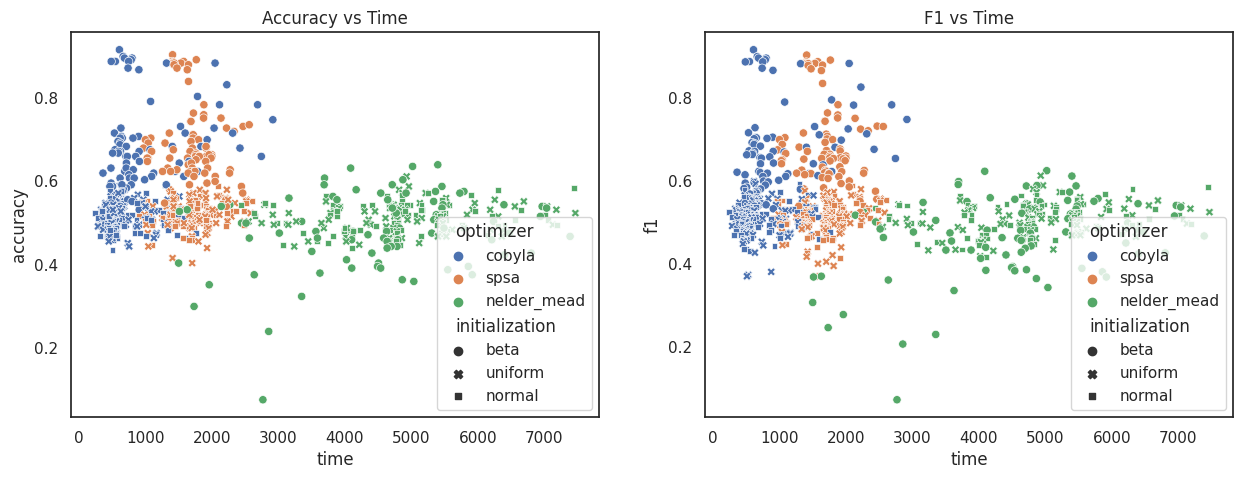

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='optimizer', style='initialization', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='optimizer', style='initialization', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [54]:
cob_runtime = res[res['optimizer']=='cobyla'].set_index(index).sort_index()['time']
spsa_runtime = res[res['optimizer']=='spsa'].set_index(index).sort_index()['time']
nelder_runtime = res[res['optimizer']=='nelder_mead'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", friedmanchisquare(cob_runtime, spsa_runtime, nelder_runtime).pvalue < 0.05)

print("COBYLA significantly shorter than SPSA", wilcoxon(cob_runtime, spsa_runtime, alternative='less').pvalue < 0.05)
print("COBYLA significantly shorter than Nelder-Mead", wilcoxon(cob_runtime, nelder_runtime, alternative='less').pvalue < 0.05)
print("SPSA significantly shorter than Nelder-Mead", wilcoxon(spsa_runtime, nelder_runtime, alternative='less').pvalue < 0.05)

Significant Differences: True
COBYLA significantly shorter than SPSA True
COBYLA significantly shorter than Nelder-Mead True
SPSA significantly shorter than Nelder-Mead True


### Ansatz

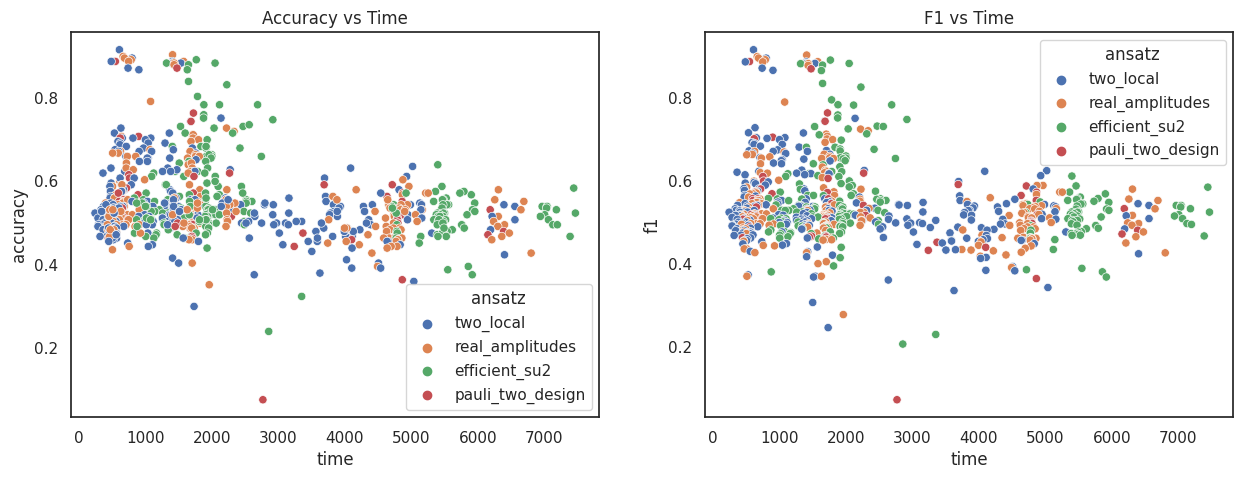

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='ansatz', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='ansatz', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [56]:
eff_runtime = res[res['ansatz']=='efficient_su2']['time']
pauli_runtime = res[res['ansatz']=='pauli_two_design']['time']
real_runtime = res[res['ansatz']=='real_amplitudes']['time']
two_runtime = res[res['ansatz']=='two_local']['time']

# significant differences in runtime
print("Significant Differences:", kruskal(eff_runtime, pauli_runtime, real_runtime, two_runtime).pvalue < 0.05)

for ansatz in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
    for ansatz2 in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
        if ansatz != ansatz2:
            sign = mannwhitneyu(res[res['ansatz']==ansatz]['time'], res[res['ansatz']==ansatz2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{ansatz}: significantly shorter than {ansatz2}", sign)

Significant Differences: True
pauli_two_design: significantly shorter than efficient_su2 True
real_amplitudes: significantly shorter than efficient_su2 True
two_local: significantly shorter than efficient_su2 True
two_local: significantly shorter than pauli_two_design True
two_local: significantly shorter than real_amplitudes True


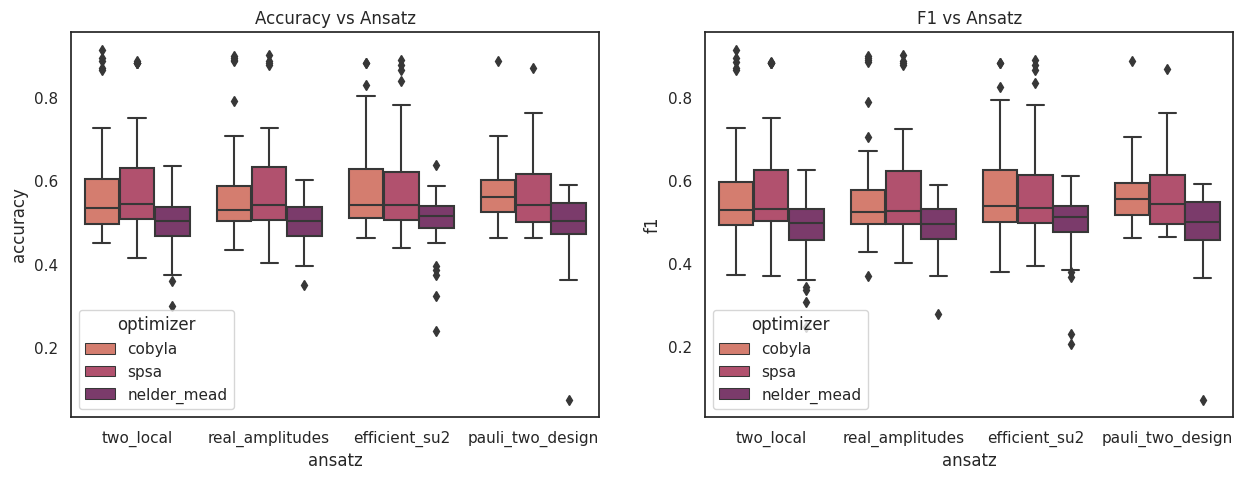

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='ansatz', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='ansatz', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Ansatz')
ax[1].set_title('F1 vs Ansatz')
plt.show()

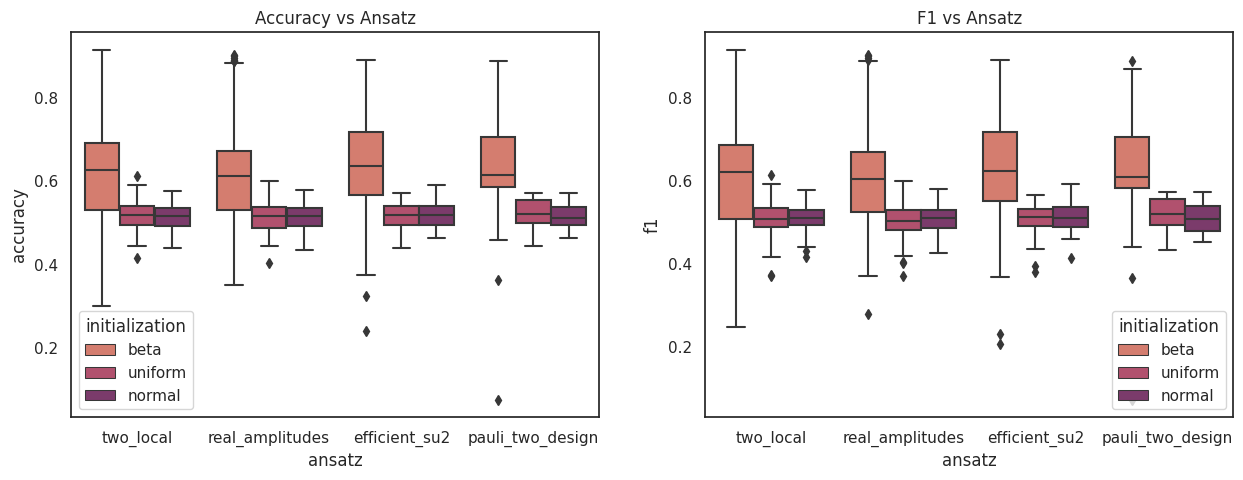

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='ansatz', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='ansatz', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Ansatz')
ax[1].set_title('F1 vs Ansatz')
plt.show()

### FeatureMap

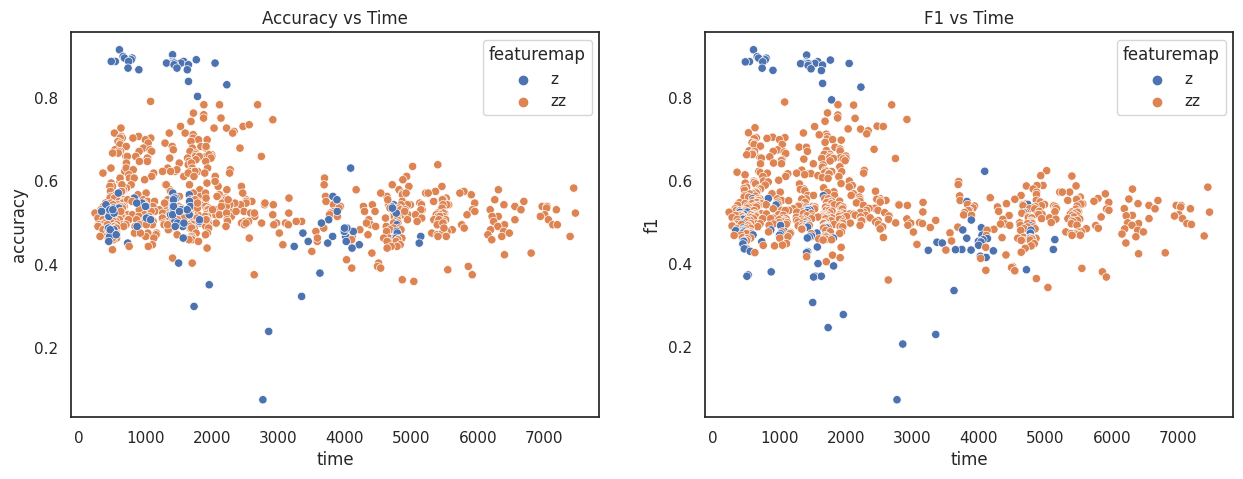

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='featuremap', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='featuremap', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [60]:
z_runtime = res[res['featuremap']=='z']['time']
zz_runtime = res[res['featuremap']=='zz']['time']

# significant differences in runtime
print("Z significantly shorter than ZZFeatureMap:", mannwhitneyu(z_runtime, zz_runtime, alternative='less').pvalue < 0.05)

Z significantly shorter than ZZFeatureMap: True


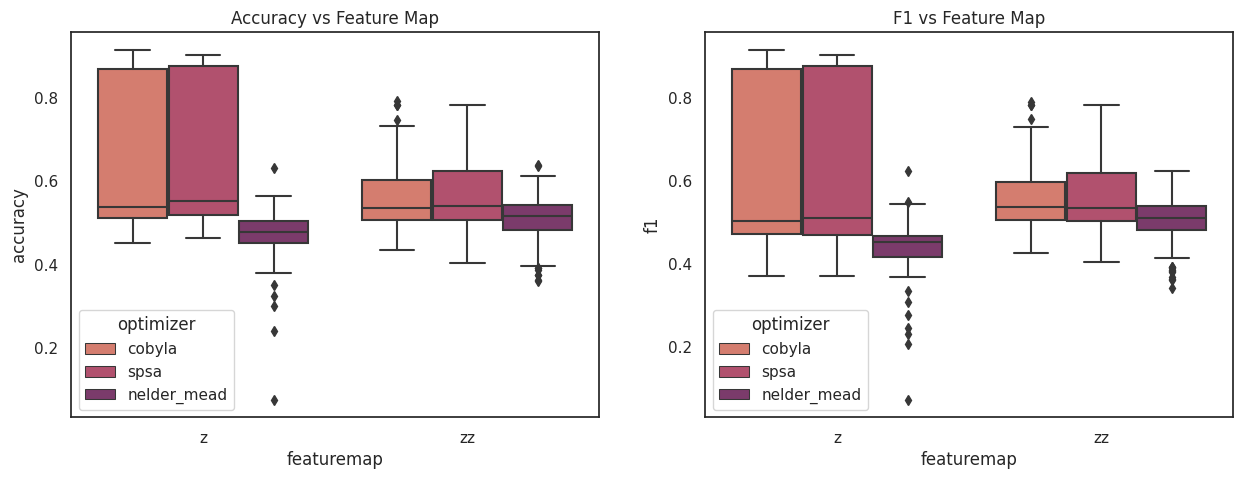

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='featuremap', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='featuremap', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map')
ax[1].set_title('F1 vs Feature Map')
plt.show()

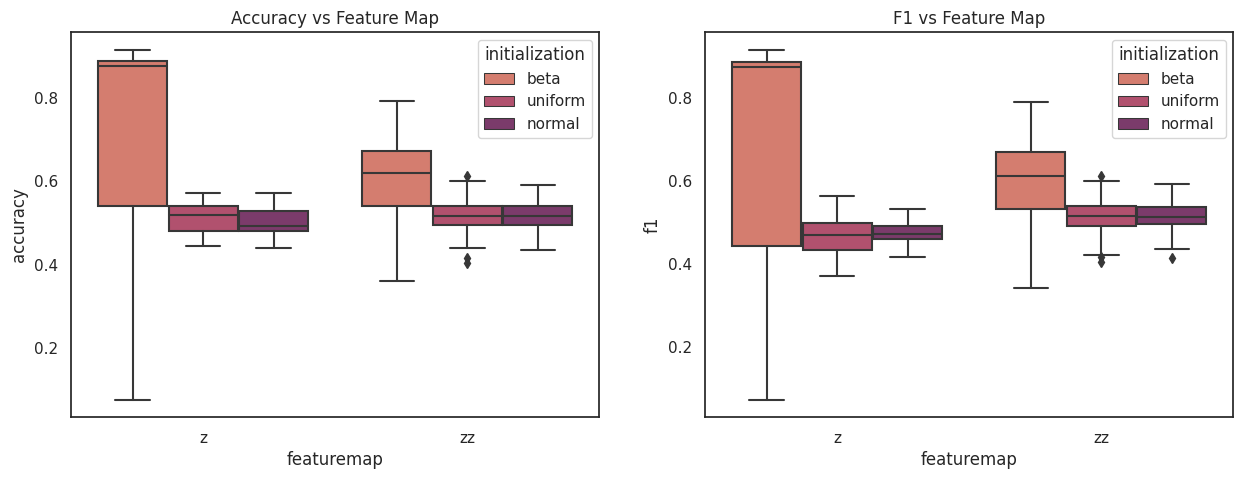

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='featuremap', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='featuremap', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map')
ax[1].set_title('F1 vs Feature Map')
plt.show()

### Ansatz Entanglement

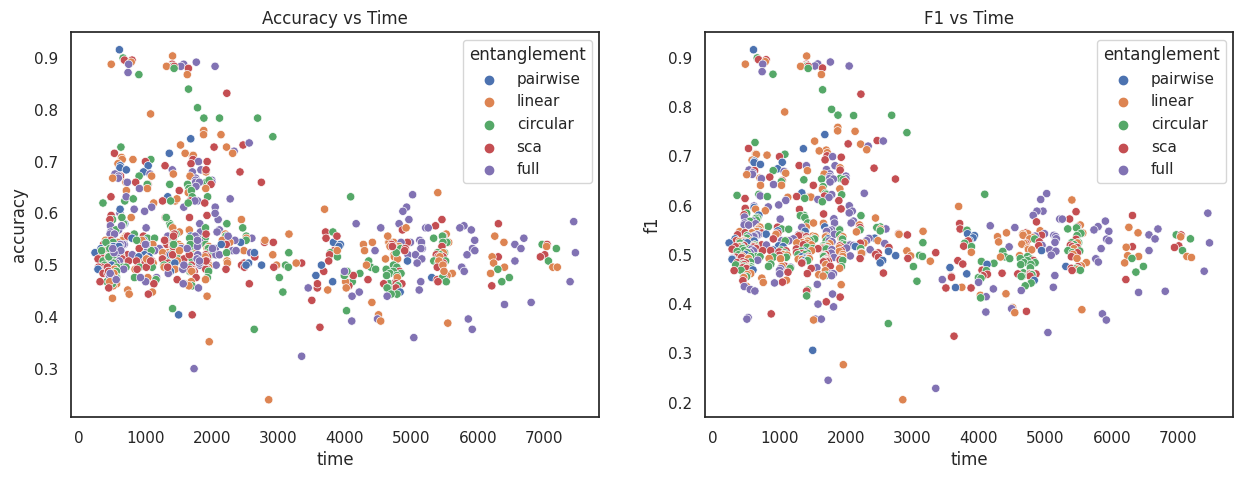

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='entanglement', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='entanglement', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [64]:
sca_runtime = res[res['entanglement']=='sca']['time']
full_runtime = res[res['entanglement']=='full']['time']
circular_runtime = res[res['entanglement']=='circular']['time']
linear_runtime = res[res['entanglement']=='linear']['time']
pairwise_runtime = res[res['entanglement']=='pairwise']['time']

# significant differences in runtime
print("Significant Differences:", kruskal(sca_runtime, full_runtime, circular_runtime, linear_runtime, pairwise_runtime).pvalue < 0.05)

for entanglement1 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
    for entanglement2 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
        if entanglement1 != entanglement2:
            sign = mannwhitneyu(res[res['entanglement']==entanglement1]['time'], res[res['entanglement']==entanglement2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{entanglement1}: significantly shorter than {entanglement2}", sign)

Significant Differences: True
sca: significantly shorter than full True
pairwise: significantly shorter than sca True
pairwise: significantly shorter than full True
pairwise: significantly shorter than circular True
pairwise: significantly shorter than linear True


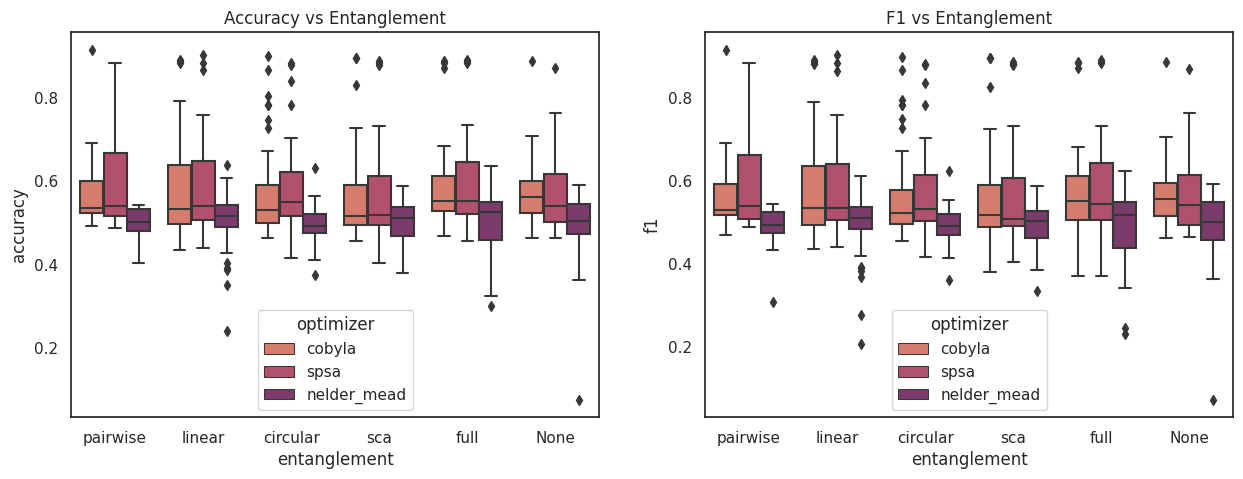

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Entanglement')
ax[1].set_title('F1 vs Entanglement')
plt.show()

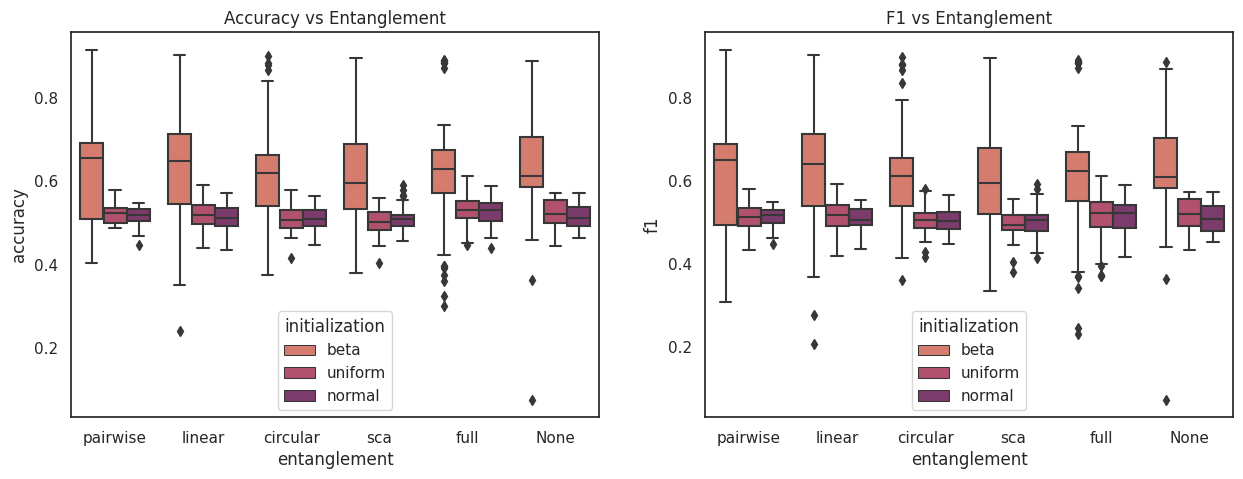

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Entanglement')
ax[1].set_title('F1 vs Entanglement')
plt.show()

### FeatureMap Entanglement

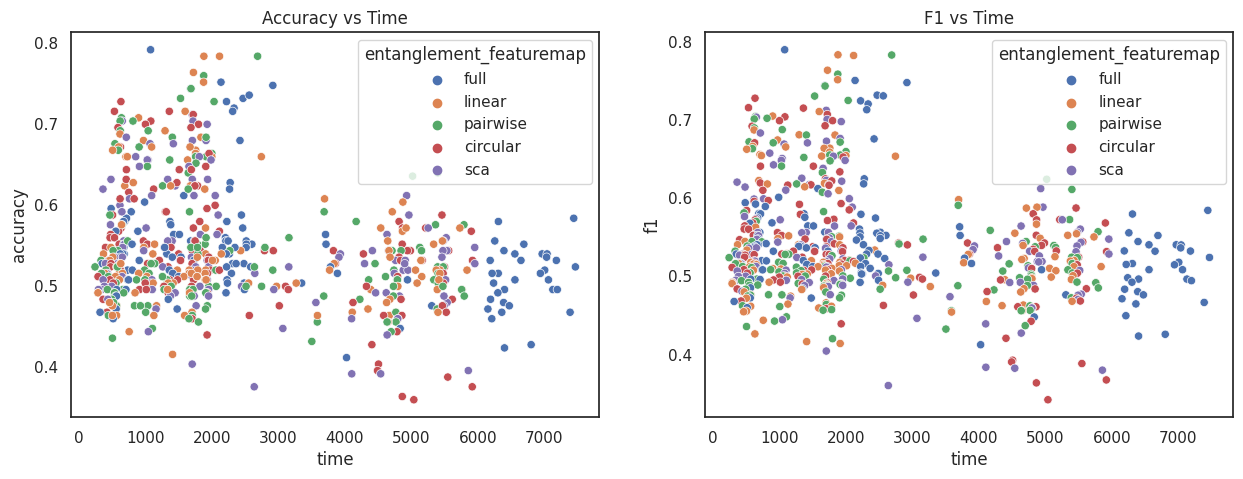

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='entanglement_featuremap', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='entanglement_featuremap', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [68]:
sca_runtime = res[res['entanglement_featuremap']=='sca'].set_index(index).sort_index()['time']
full_runtime = res[res['entanglement_featuremap']=='full'].set_index(index).sort_index()['time']
circular_runtime = res[res['entanglement_featuremap']=='circular'].set_index(index).sort_index()['time']
linear_runtime = res[res['entanglement_featuremap']=='linear'].set_index(index).sort_index()['time']
pairwise_runtime = res[res['entanglement_featuremap']=='pairwise'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", friedmanchisquare(sca_runtime, full_runtime, circular_runtime, linear_runtime, pairwise_runtime).pvalue < 0.05)

for entanglement1 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
    for entanglement2 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
        if entanglement1 != entanglement2:
            sign = wilcoxon(res[res['entanglement_featuremap']==entanglement1]['time'], res[res['entanglement_featuremap']==entanglement2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{entanglement1}: significantly shorter than {entanglement2}", sign)

Significant Differences: True
sca: significantly shorter than full True
circular: significantly shorter than full True
linear: significantly shorter than full True
pairwise: significantly shorter than full True


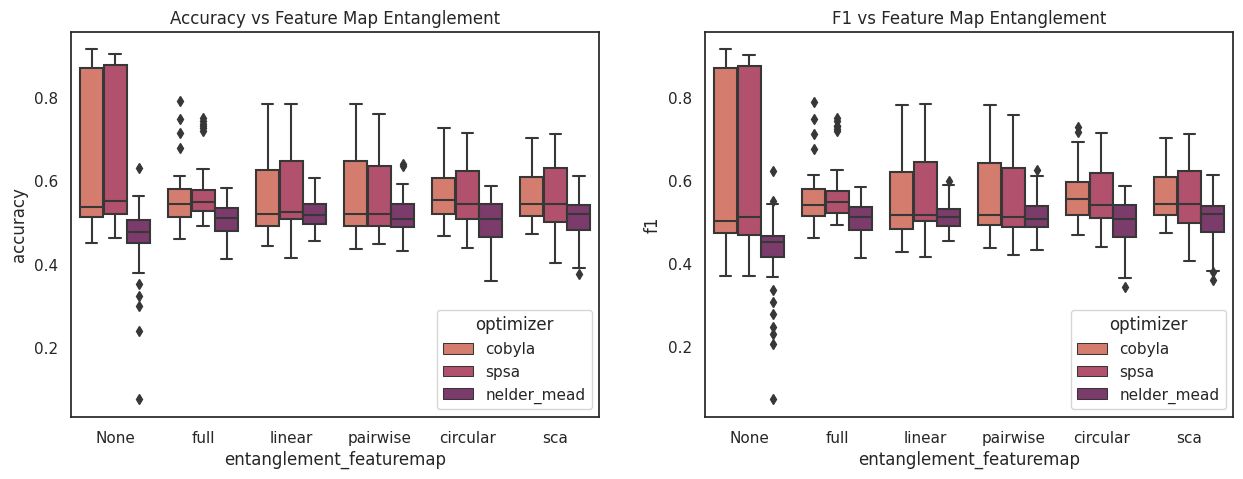

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement_featuremap', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map Entanglement')
ax[1].set_title('F1 vs Feature Map Entanglement')
plt.show()


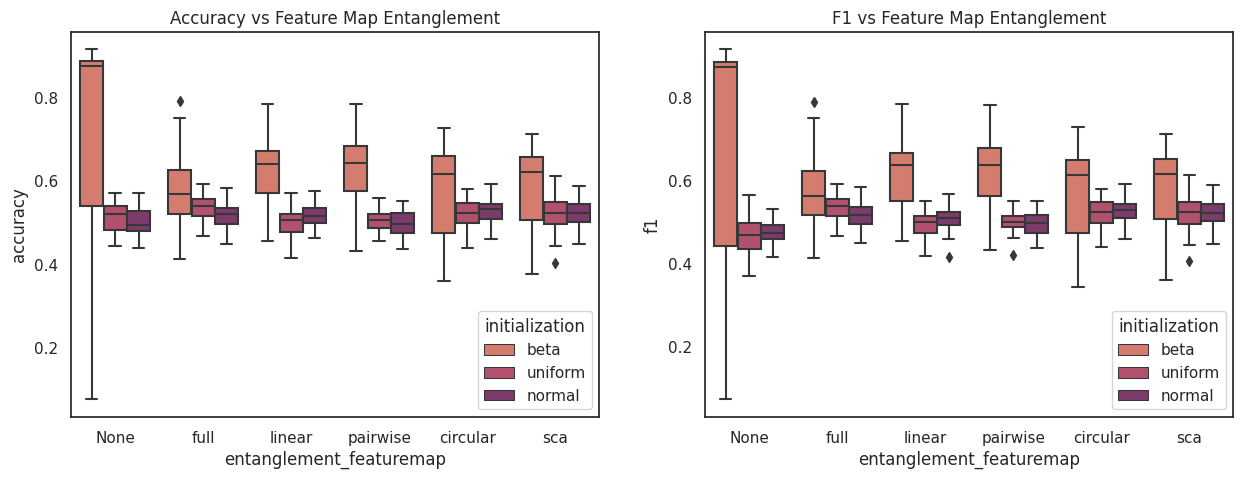

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement_featuremap', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map Entanglement')
ax[1].set_title('F1 vs Feature Map Entanglement')
plt.show()


### Initialization

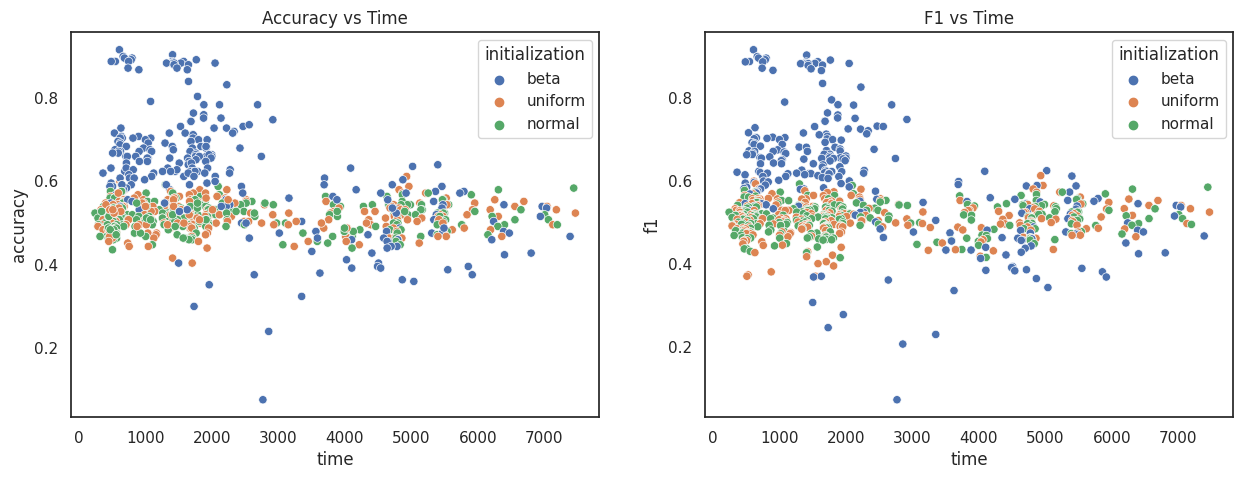

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='initialization', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='initialization', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [72]:
beta = res[res['initialization']=='beta'].set_index(index).sort_index()['time']
normal = res[res['initialization']=='normal'].set_index(index).sort_index()['time']
uniform = res[res['initialization']=='uniform'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", kruskal(beta, normal, uniform).pvalue < 0.05)

Significant Differences: False


In [73]:
res.groupby(['optimizer', 'initialization'])[['iterations', 'time']].mean()

iterations         time
optimizer   initialization                         
cobyla      beta            198.738095  1022.262344
            normal          143.714286   741.642571
            uniform         142.940476   730.443012
nelder_mead beta            917.261905  4513.688786
            normal          988.345238  4819.237636
            uniform         986.571429  4824.243069
spsa        beta            351.000000  1698.766001
            normal          351.000000  1716.823418
            uniform         351.000000  1713.853704

## Plot multiple variables

In [74]:
r = res_better.copy()
# replace all None with 'None'
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'

### Time vs. Hyperparameters

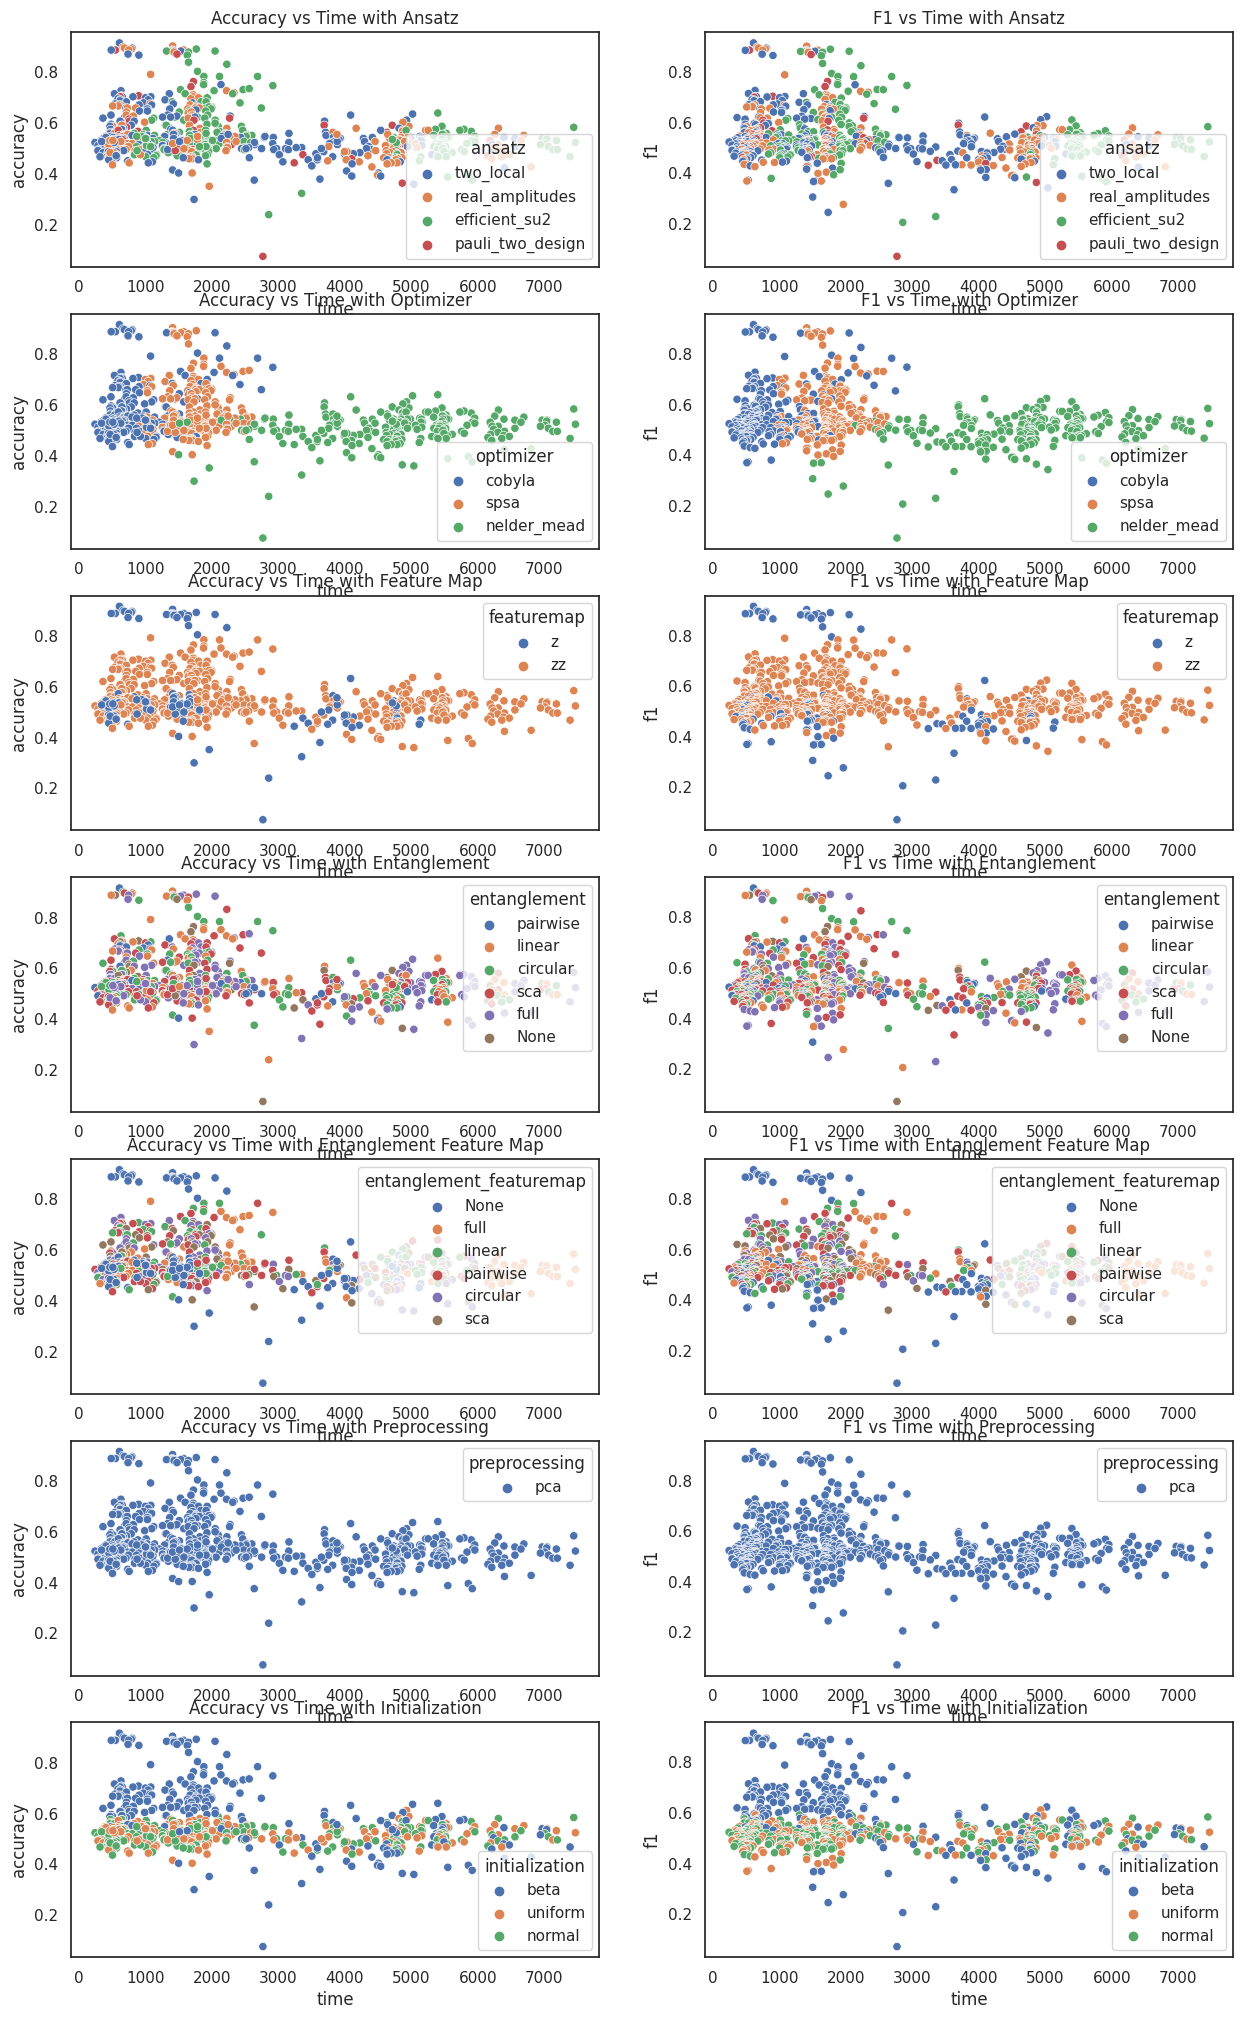

In [75]:
fig, ax = plt.subplots(7, 2, figsize=(15, 25))
sns.scatterplot(data=r, x='time', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='featuremap', palette='deep', ax=ax[2, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='featuremap', palette='deep', ax=ax[2, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='entanglement', palette='deep', ax=ax[3, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='entanglement', palette='deep', ax=ax[3, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[4, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='entanglement_featuremap', palette='deep', ax=ax[4, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='preprocessing', palette='deep', ax=ax[5, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='preprocessing', palette='deep', ax=ax[5, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='initialization', palette='deep', ax=ax[6, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='initialization', palette='deep', ax=ax[6, 1])
ax[0, 0].set_title('Accuracy vs Time with Ansatz')
ax[0, 1].set_title('F1 vs Time with Ansatz')
ax[2, 0].set_title('Accuracy vs Time with Feature Map')
ax[2, 1].set_title('F1 vs Time with Feature Map')
ax[3, 0].set_title('Accuracy vs Time with Entanglement')
ax[3, 1].set_title('F1 vs Time with Entanglement')
ax[4, 0].set_title('Accuracy vs Time with Entanglement Feature Map')
ax[4, 1].set_title('F1 vs Time with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Time with Optimizer')
ax[1, 1].set_title('F1 vs Time with Optimizer')
ax[5, 0].set_title('Accuracy vs Time with Preprocessing')
ax[5, 1].set_title('F1 vs Time with Preprocessing')
ax[6, 0].set_title('Accuracy vs Time with Initialization')
ax[6, 1].set_title('F1 vs Time with Initialization')
plt.show()

### Ansatz vs Accuracy/Time and additional parameters

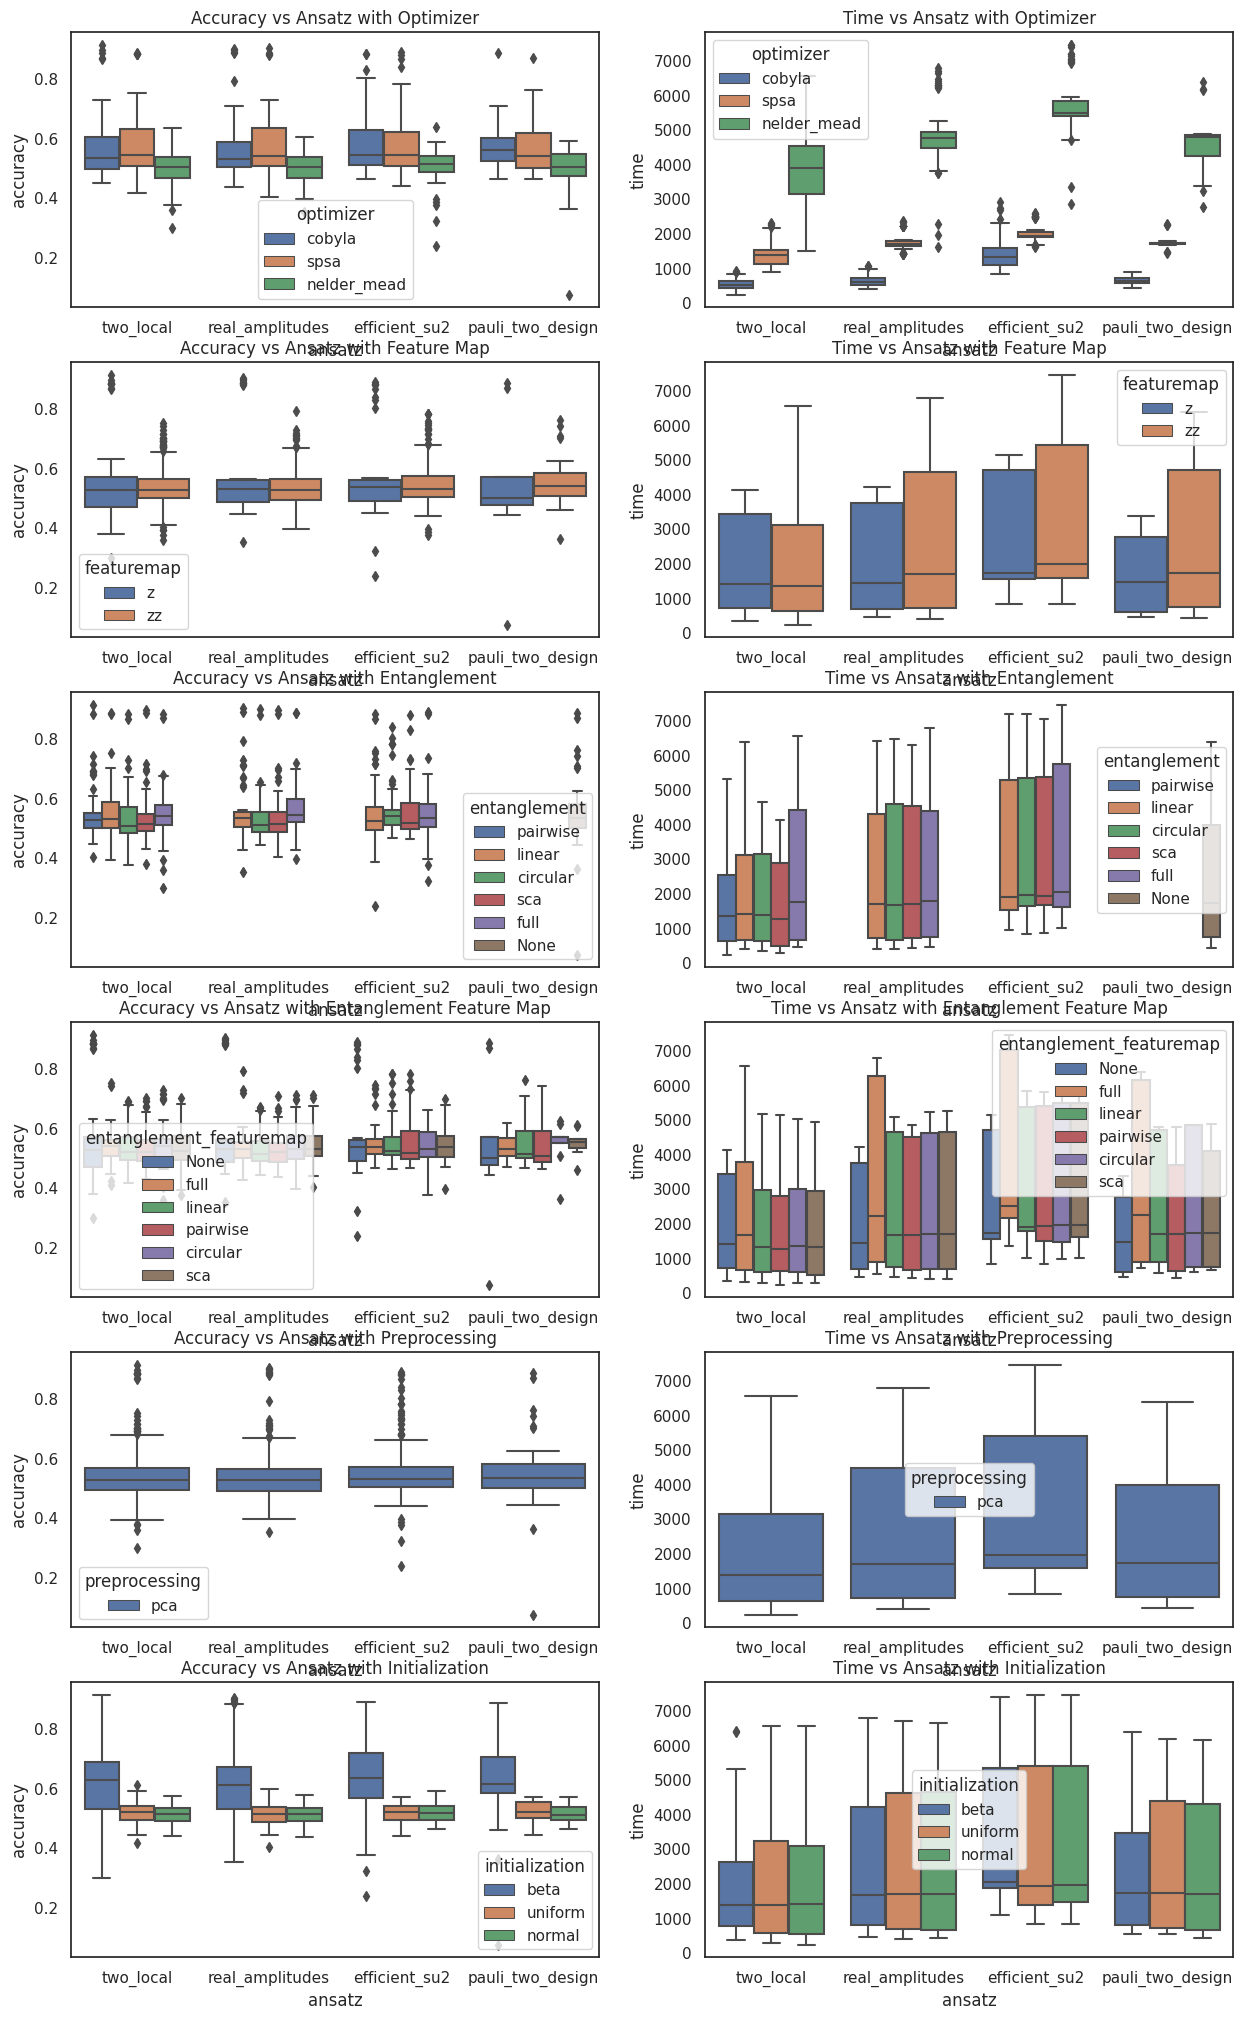

In [76]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='featuremap', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='featuremap', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='optimizer', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='optimizer', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[1, 0].set_title('Accuracy vs Ansatz with Feature Map')
ax[1, 1].set_title('Time vs Ansatz with Feature Map')
ax[2, 0].set_title('Accuracy vs Ansatz with Entanglement')
ax[2, 1].set_title('Time vs Ansatz with Entanglement')
ax[3, 0].set_title('Accuracy vs Ansatz with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Ansatz with Entanglement Feature Map')
ax[0, 0].set_title('Accuracy vs Ansatz with Optimizer')
ax[0, 1].set_title('Time vs Ansatz with Optimizer')
ax[4, 0].set_title('Accuracy vs Ansatz with Preprocessing')
ax[4, 1].set_title('Time vs Ansatz with Preprocessing')
ax[5, 0].set_title('Accuracy vs Ansatz with Initialization')
ax[5, 1].set_title('Time vs Ansatz with Initialization')
plt.show()


### FeatureMap vs. Accuracy/Time and additional parameters

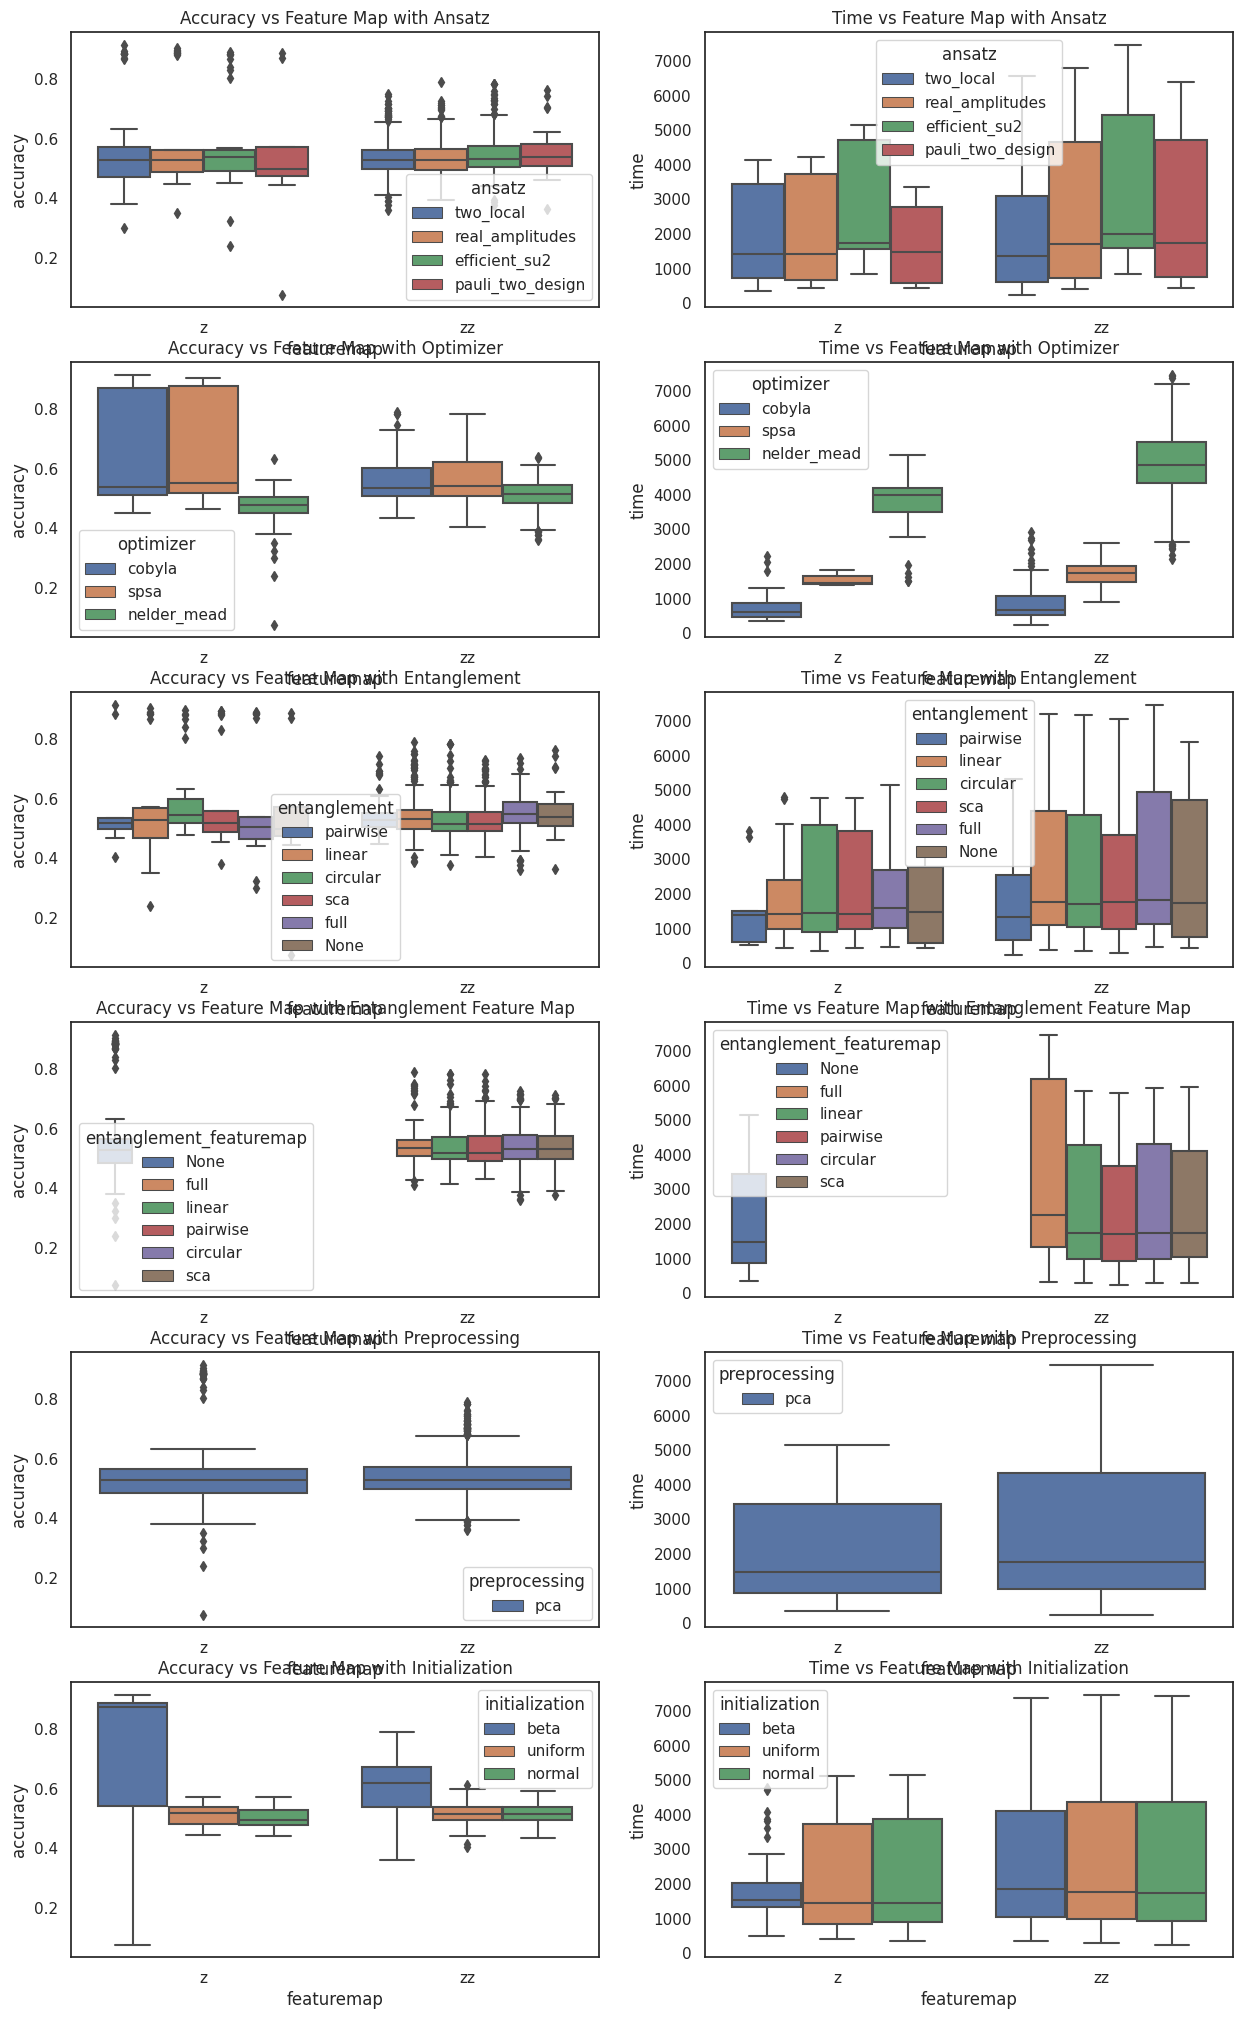

In [77]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Feature Map with Ansatz')
ax[0, 1].set_title('Time vs Feature Map with Ansatz')
ax[2, 0].set_title('Accuracy vs Feature Map with Entanglement')
ax[2, 1].set_title('Time vs Feature Map with Entanglement')
ax[3, 0].set_title('Accuracy vs Feature Map with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Feature Map with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Feature Map with Optimizer')
ax[1, 1].set_title('Time vs Feature Map with Optimizer')
ax[4, 0].set_title('Accuracy vs Feature Map with Preprocessing')
ax[4, 1].set_title('Time vs Feature Map with Preprocessing')
ax[5, 0].set_title('Accuracy vs Feature Map with Initialization')
ax[5, 1].set_title('Time vs Feature Map with Initialization')
plt.show()

### Entanglement vs Accuracy/Time and additional parameters

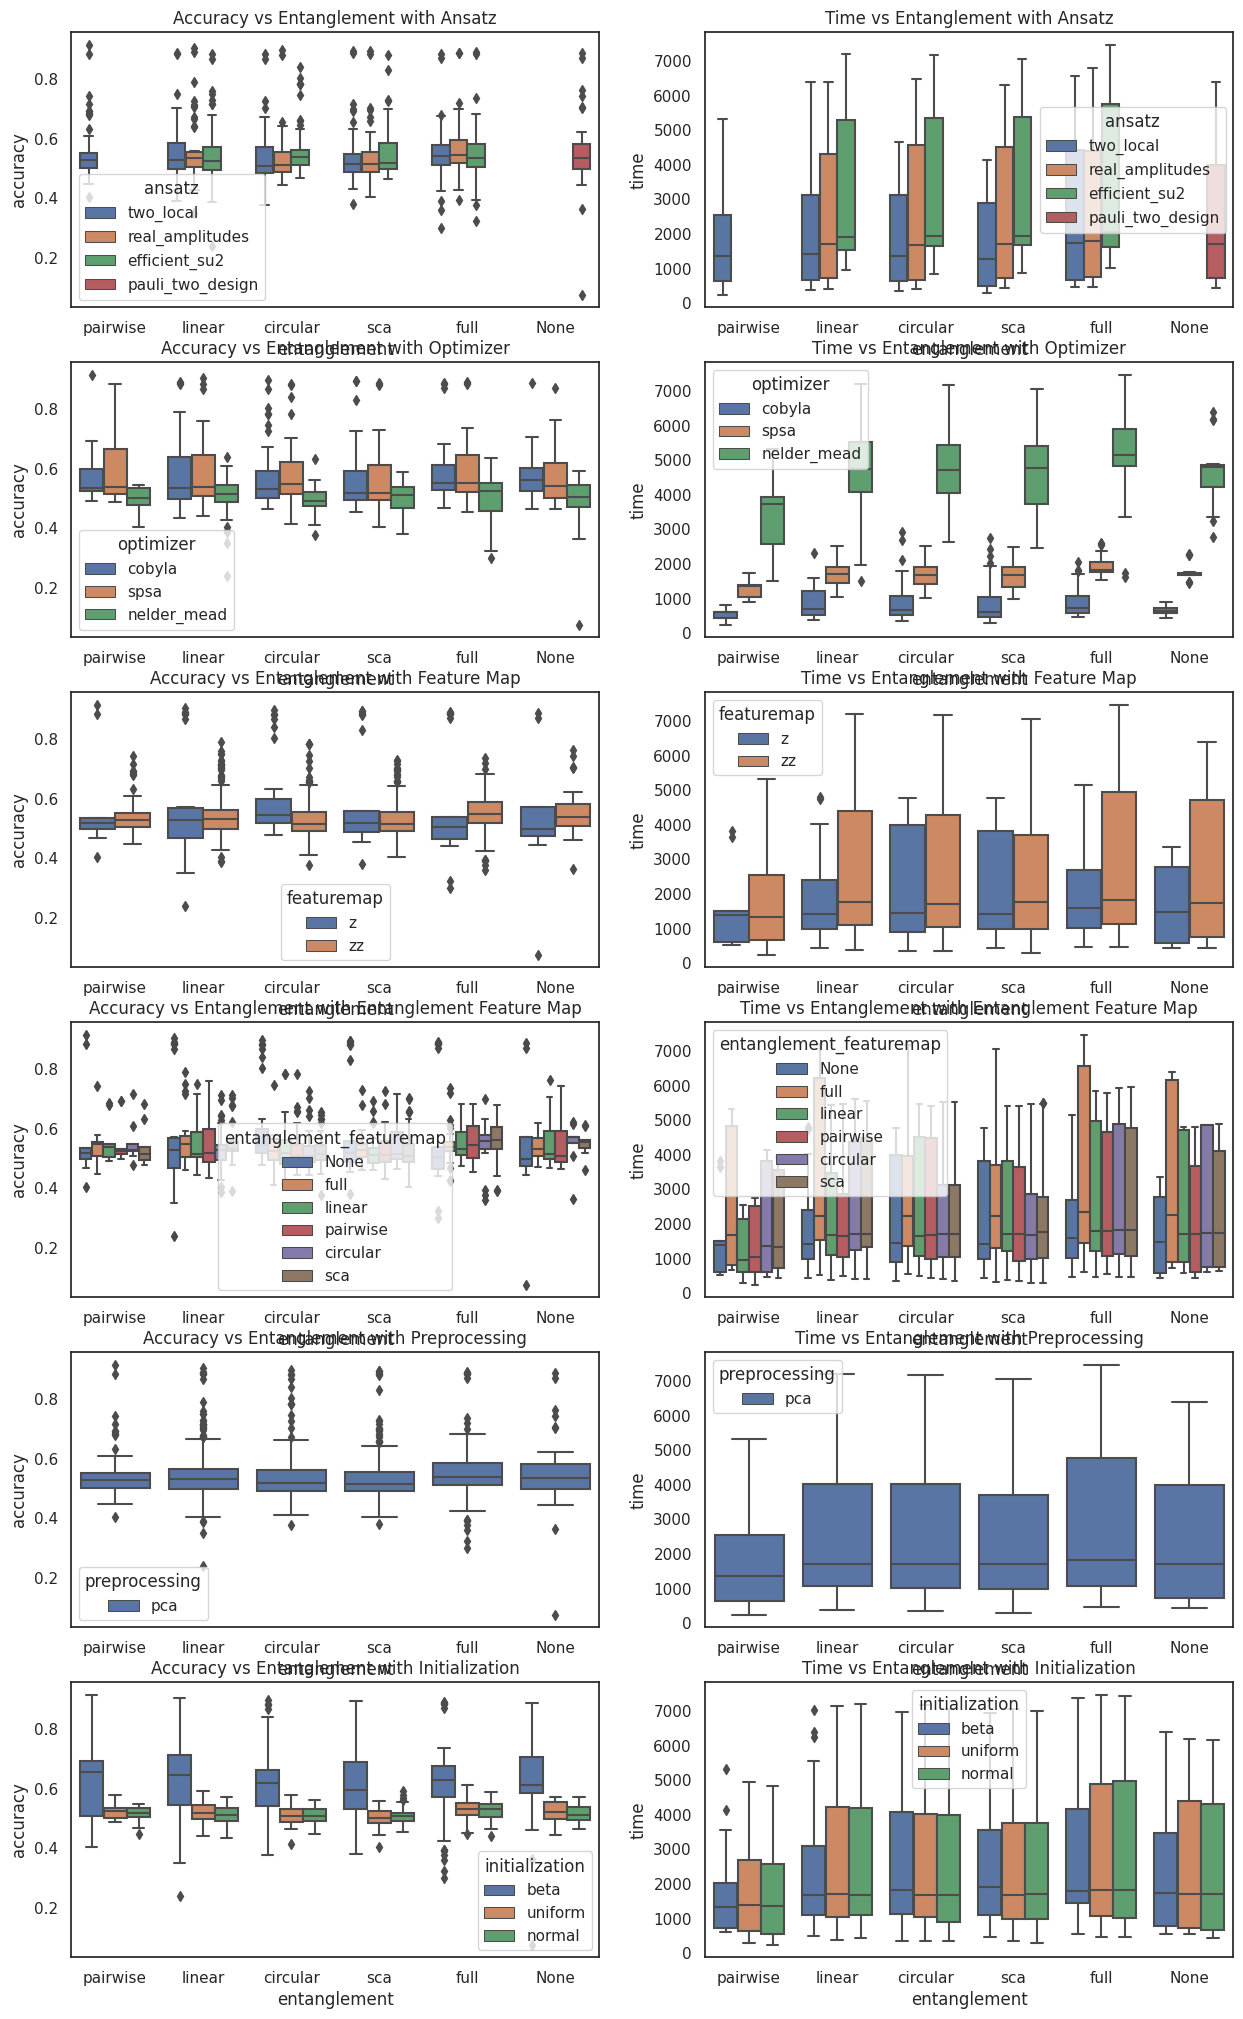

In [78]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='featuremap', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='featuremap', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Entanglement with Ansatz')
ax[0, 1].set_title('Time vs Entanglement with Ansatz')
ax[2, 0].set_title('Accuracy vs Entanglement with Feature Map')
ax[2, 1].set_title('Time vs Entanglement with Feature Map')
ax[3, 0].set_title('Accuracy vs Entanglement with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Entanglement with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Entanglement with Optimizer')
ax[1, 1].set_title('Time vs Entanglement with Optimizer')
ax[4, 0].set_title('Accuracy vs Entanglement with Preprocessing')
ax[4, 1].set_title('Time vs Entanglement with Preprocessing')
ax[5, 0].set_title('Accuracy vs Entanglement with Initialization')
ax[5, 1].set_title('Time vs Entanglement with Initialization')
plt.show()


### FeatureMap Entanglement vs. Accuracy/Time and additional parameters

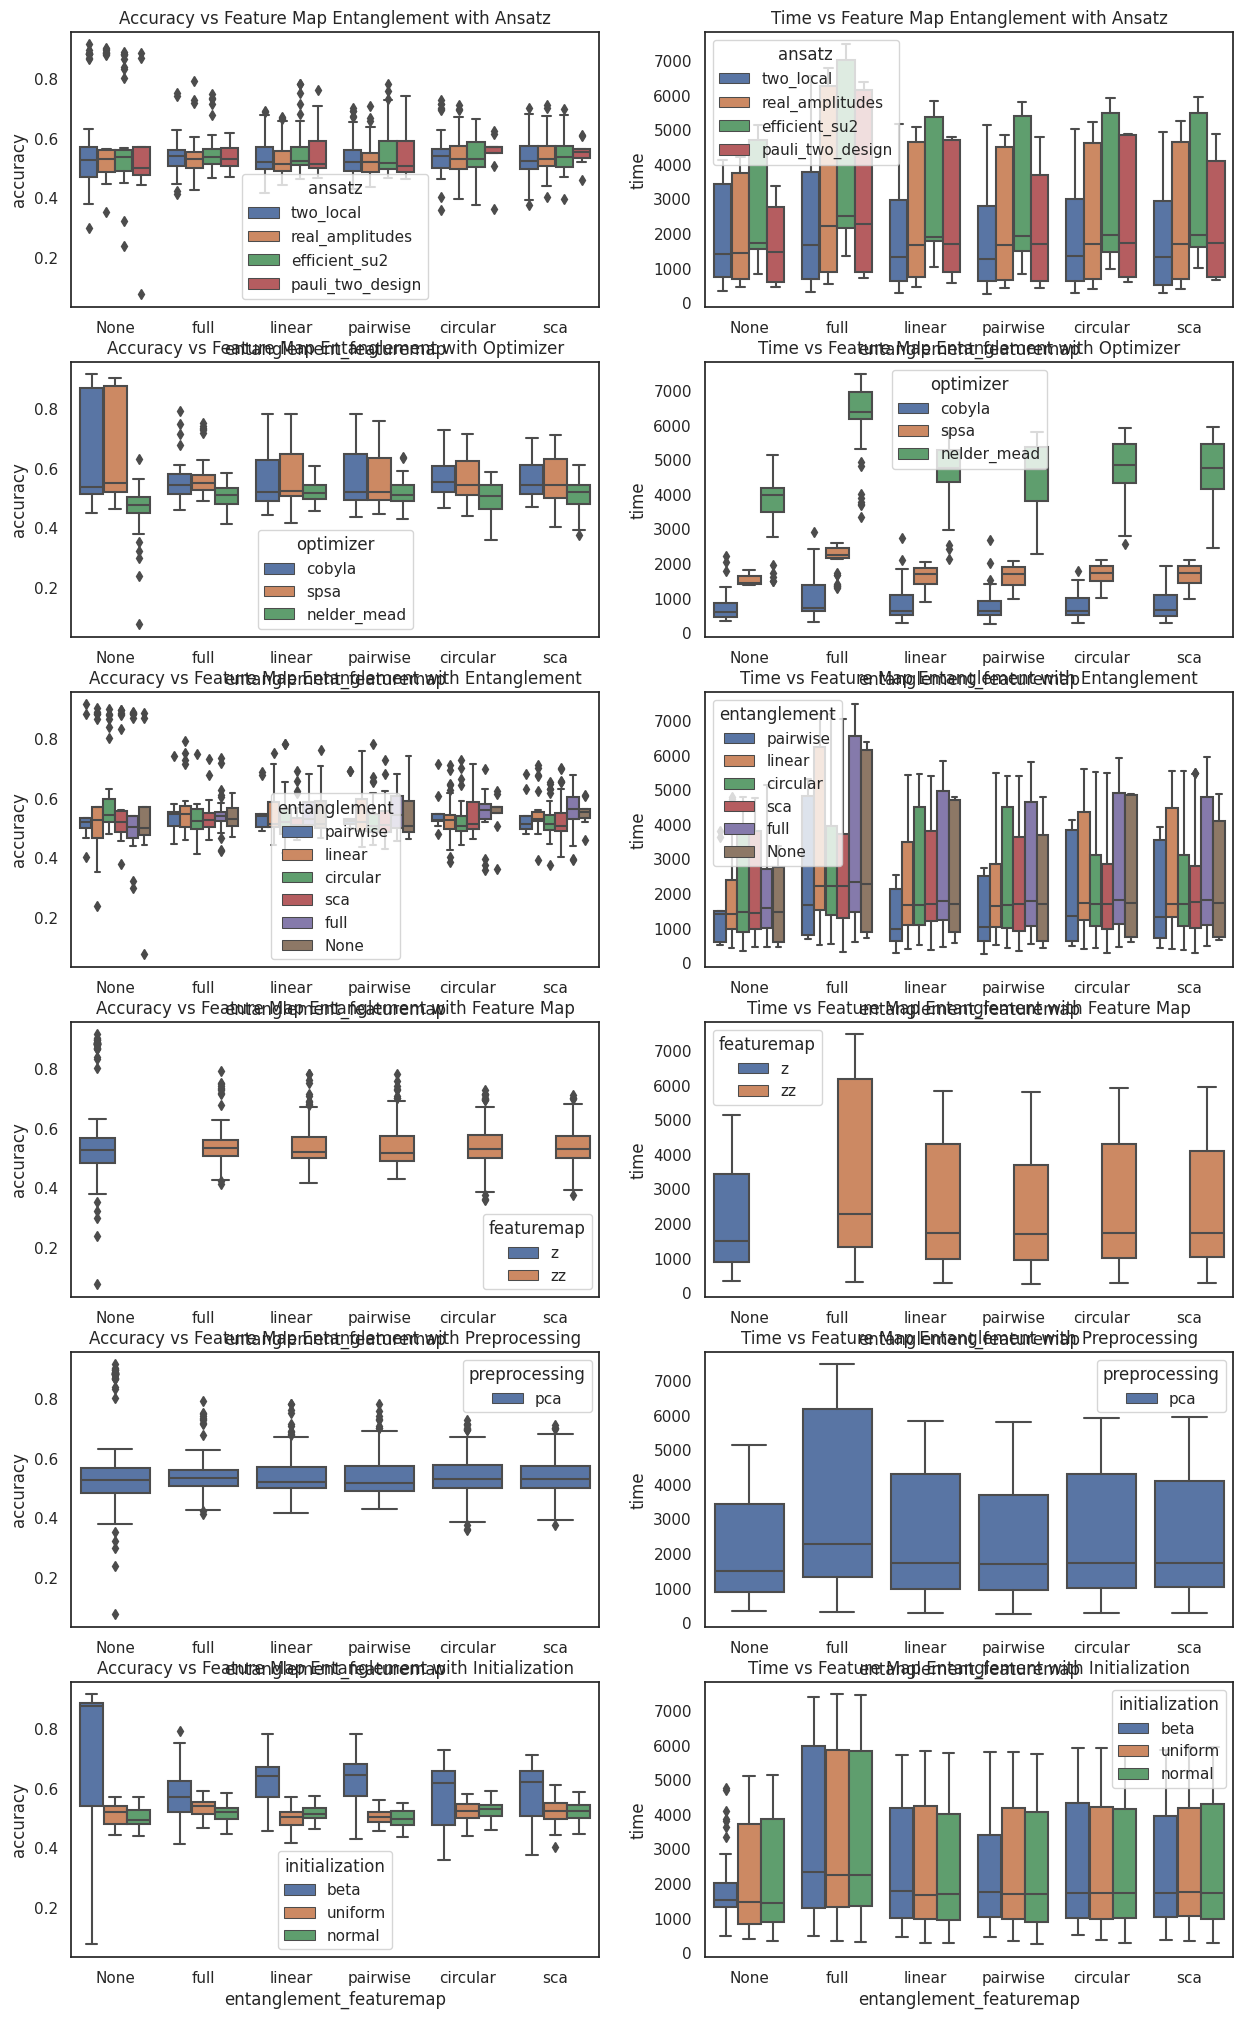

In [79]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Feature Map Entanglement with Ansatz')
ax[0, 1].set_title('Time vs Feature Map Entanglement with Ansatz')
ax[2, 0].set_title('Accuracy vs Feature Map Entanglement with Entanglement')
ax[2, 1].set_title('Time vs Feature Map Entanglement with Entanglement')
ax[3, 0].set_title('Accuracy vs Feature Map Entanglement with Feature Map')
ax[3, 1].set_title('Time vs Feature Map Entanglement with Feature Map')
ax[1, 0].set_title('Accuracy vs Feature Map Entanglement with Optimizer')
ax[1, 1].set_title('Time vs Feature Map Entanglement with Optimizer')
ax[4, 0].set_title('Accuracy vs Feature Map Entanglement with Preprocessing')
ax[4, 1].set_title('Time vs Feature Map Entanglement with Preprocessing')
ax[5, 0].set_title('Accuracy vs Feature Map Entanglement with Initialization')
ax[5, 1].set_title('Time vs Feature Map Entanglement with Initialization')
plt.show()

In [80]:
len(res)

756

## Analyze Worst
* Only Nelson-Mead configurations
* Sca ansatz entanglement less common in worst configurations
* Full and sca feature map entanglement slightly less common

In [81]:
worst.groupby(['optimizer'])['accuracy'].count()/res.groupby(['optimizer'])['accuracy'].count()

optimizer
cobyla              NaN
nelder_mead    0.003968
spsa                NaN
Name: accuracy, dtype: float64

In [82]:
worst.groupby(['ansatz'])['accuracy'].count()/res.groupby(['ansatz'])['accuracy'].count()

ansatz
efficient_su2            NaN
pauli_two_design    0.018519
real_amplitudes          NaN
two_local                NaN
Name: accuracy, dtype: float64

In [83]:
worst.groupby(['featuremap'])['accuracy'].count()/res.groupby(['featuremap'])['accuracy'].count()

featuremap
z     0.007937
zz         NaN
Name: accuracy, dtype: float64

In [84]:
worst.groupby(['entanglement'])['accuracy'].count()/res.groupby(['entanglement'])['accuracy'].count()

entanglement
circular   NaN
full       NaN
linear     NaN
pairwise   NaN
sca        NaN
Name: accuracy, dtype: float64

In [85]:
worst.groupby(['ansatz', 'entanglement'])['accuracy'].count()/res.groupby(['ansatz', 'entanglement'])['accuracy'].count()

ansatz           entanglement
efficient_su2    circular       NaN
                 full           NaN
                 linear         NaN
                 sca            NaN
real_amplitudes  circular       NaN
                 full           NaN
                 linear         NaN
                 sca            NaN
two_local        circular       NaN
                 full           NaN
                 linear         NaN
                 pairwise       NaN
                 sca            NaN
Name: accuracy, dtype: float64

In [86]:
worst.groupby(['entanglement_featuremap'])['accuracy'].count()/res.groupby(['entanglement_featuremap'])['accuracy'].count()

entanglement_featuremap
circular   NaN
full       NaN
linear     NaN
pairwise   NaN
sca        NaN
Name: accuracy, dtype: float64

In [87]:
worst.groupby(['preprocessing'])['accuracy'].count()/res.groupby(['preprocessing'])['accuracy'].count()

preprocessing
pca    0.001323
Name: accuracy, dtype: float64

In [88]:
worst.groupby(['initialization'])['accuracy'].count()/res.groupby(['initialization'])['accuracy'].count()

initialization
beta       0.003968
normal          NaN
uniform         NaN
Name: accuracy, dtype: float64

# Plot

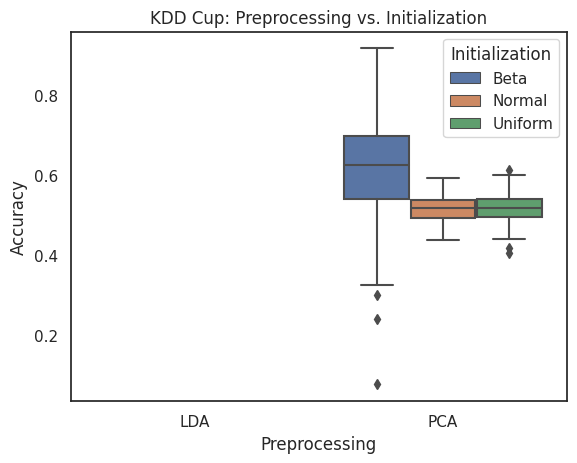

In [89]:
sns.boxplot(data=res, x='preprocessing', y='accuracy', hue='initialization', palette='deep', order=['lda', 'pca'], hue_order=['beta', 'normal', 'uniform'])
plt.title('KDD Cup: Preprocessing vs. Initialization')
plt.xlabel('Preprocessing')
plt.ylabel('Accuracy')
plt.xticks([0,1], ['LDA', 'PCA'])
legend = plt.legend(title='Initialization')
for label in legend.get_texts():
    if label.get_text() == 'uniform':
        label.set_text('Uniform')
    else:
        label.set_text(label.get_text().capitalize())
# plt.savefig("../reports/figures/kdd_accuracy_vs_preprocessing_init.png", bbox_inches='tight')
plt.show()

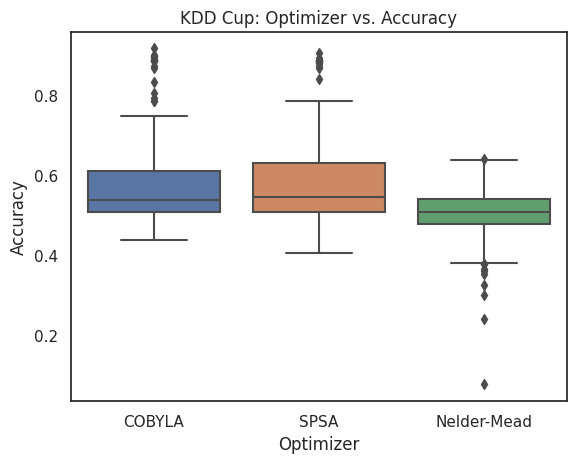

In [90]:
sns.boxplot(data=res, x='optimizer', y='accuracy', palette='deep', order=['cobyla', 'spsa', 'nelder_mead'])
plt.title("KDD Cup: Optimizer vs. Accuracy")
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.xticks([0, 1, 2], ['COBYLA', 'SPSA', 'Nelder-Mead'])
# plt.savefig("../reports/figures/kdd_optimizer.png", bbox_inches='tight')
plt.show()

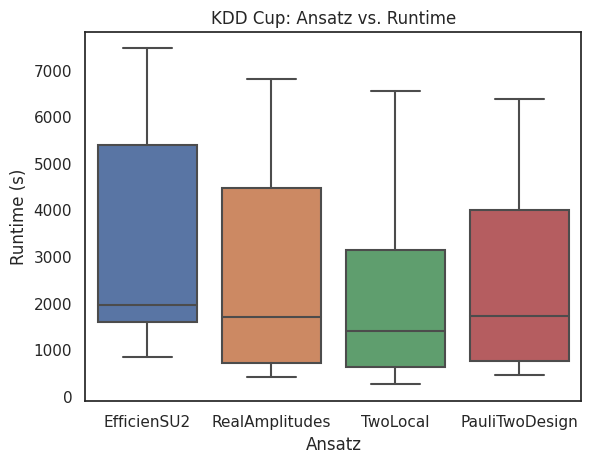

In [91]:
sns.boxplot(data=res, x='ansatz', y='time', palette='deep', order=['efficient_su2', 'real_amplitudes', 'two_local', 'pauli_two_design'])
plt.title("KDD Cup: Ansatz vs. Runtime")
plt.xlabel("Ansatz")
plt.ylabel("Runtime (s)")
plt.xticks([0, 1, 2, 3], ['EfficienSU2', 'RealAmplitudes', 'TwoLocal', 'PauliTwoDesign'])
# plt.savefig("../reports/figures/kdd_ansatz_time.png", bbox_inches='tight')
plt.show()

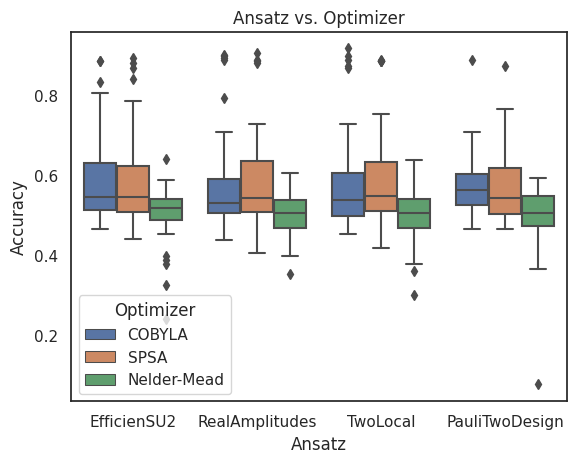

In [92]:
sns.boxplot(res, x='ansatz', y='accuracy', hue='optimizer', palette='deep', order=['efficient_su2', 'real_amplitudes', 'two_local', 'pauli_two_design'], hue_order=['cobyla', 'spsa', 'nelder_mead'])
plt.title("Ansatz vs. Optimizer")
plt.xlabel("Ansatz")
plt.ylabel("Accuracy")
plt.xticks([0, 1, 2, 3], ['EfficienSU2', 'RealAmplitudes', 'TwoLocal', 'PauliTwoDesign'])
l = plt.legend(title="Optimizer", loc='lower left')
for text in l.get_texts():
    if text.get_text() == 'cobyla':
        text.set_text('COBYLA')
    elif text.get_text() == 'spsa':
        text.set_text('SPSA')
    elif text.get_text() == 'nelder_mead':
        text.set_text('Nelder-Mead')
# plt.savefig("../reports/figures/kdd_ansatz_optimizer.png", bbox_inches='tight')

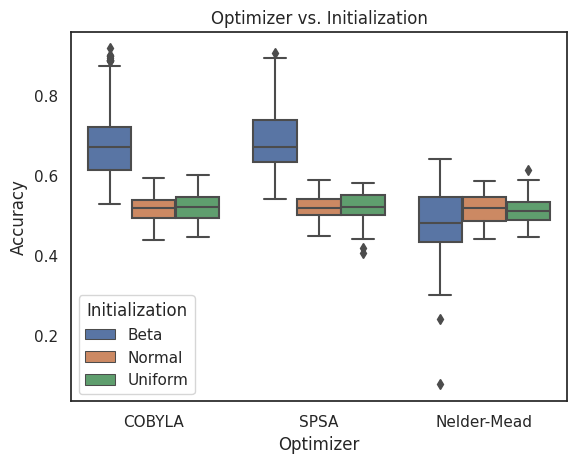

In [93]:
sns.boxplot(res, x='optimizer', y='accuracy', hue='initialization', palette='deep', order=['cobyla', 'spsa', 'nelder_mead'], hue_order=['beta', 'normal', 'uniform'])
plt.xlabel("Optimizer")
plt.ylabel("Accuracy")
plt.title("Optimizer vs. Initialization")
plt.xticks([0, 1, 2], ['COBYLA', 'SPSA', 'Nelder-Mead'])
l = plt.legend(title="Initialization", loc='lower left')
for text in l.get_texts():
    if text.get_text() == 'uniform':
        text.set_text('Uniform')
    else:
        text.set_text(text.get_text().capitalize())
# plt.savefig("../reports/figures/kdd_optimizer_init.png", bbox_inches='tight')